In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## The Data
Data source: https://stockx.com/news/the-2019-data-contest/

Data information:

The data consists of a random sample of all Off-White Nike and Yeezy sales from StockX between 9/11/2017 and 2/13/2019. There are total of 99,956 sales and consists of US sales only. It has 8 variables Order Date, Brand, Sneaker Name, Sale Price, Retail Price, Release Date, Shoe Size, and Buyer State.

In [2]:
df = pd.read_csv(r'C:\Users\Playtech\Desktop\StockX-Data-Contest-2019-3.csv')
df

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/01/2017,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/01/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/01/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/01/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/01/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/2017,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$565,$220,12/26/18,8.0,Oregon
99952,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$598,$220,12/26/18,8.5,California
99953,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$605,$220,12/26/18,5.5,New York
99954,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$650,$220,12/26/18,11.0,California


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  object 
 4   Retail Price  99956 non-null  object 
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


### Data Cleaning

In [ ]:
#Removing $ and comma from Sale Price then converting the data to type int
df['Sale Price'] = df['Sale Price'].apply(lambda x: x.split('$')[-1].replace(',',"")).astype('int')

In [ ]:
#Removing $ from Retail Price then converting the data to type int
df['Retail Price'] = df['Retail Price'].apply(lambda x: x.split('$')[-1]).astype('int')

In [8]:
#Converting to datetime 
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Release Date'] = pd.to_datetime(df['Release Date'])

In [10]:
#Creating Profit and Profit Margin Column
df['Profit'] = df['Sale Price'] - df['Retail Price']
df['Profit Margin %'] = (( df['Sale Price'] - df['Retail Price'] ) /  df['Retail Price']) * 100

In [12]:
#Creating Month, Year, Day of the Week columns
df['Year'] = pd.to_datetime(df['Order Date']).dt.year
df['Month'] = pd.to_datetime(df['Order Date']).dt.month_name()
df['Day of Week'] = pd.to_datetime(df['Order Date']).dt.day_name()

In [124]:
#While trying to plot graphs I noticed the name of the Brand 'Yeezy' had a white space in front of it, written as ' Yeezy'
df['Brand'].unique()

array([' Yeezy', 'Off-White'], dtype=object)

In [13]:
df['Brand'] = df['Brand'].str.strip()

### Analysis

In [14]:
#Top 10 Highest Sale Price
df.nlargest(10,'Sale Price')

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit,Profit Margin %,Year,Month,Day of Week
26870,2018-05-26,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,4050,190,2017-09-09,6.0,Wisconsin,3860,2031.578947,2018,May,Saturday
43410,2018-08-10,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,3700,190,2017-09-09,6.5,New York,3510,1847.368421,2018,August,Friday
25935,2018-05-16,Off-White,Air-Jordan-1-Retro-High-Off-White-University-Blue,3680,190,2018-06-23,9.5,New Jersey,3490,1836.842105,2018,May,Wednesday
47061,2018-08-30,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,3500,190,2017-09-09,6.5,New York,3310,1742.105263,2018,August,Thursday
95189,2019-02-03,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,3400,190,2017-09-09,7.0,California,3210,1689.473684,2019,February,Sunday
52620,2018-10-05,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,3396,190,2017-09-09,7.0,New York,3206,1687.368421,2018,October,Friday
49238,2018-09-19,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,3275,190,2017-09-09,8.5,California,3085,1623.684211,2018,September,Wednesday
95188,2019-02-03,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,3100,190,2017-09-09,8.0,California,2910,1531.578947,2019,February,Sunday
93926,2019-01-29,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,3086,190,2017-09-09,7.5,New York,2896,1524.210526,2019,January,Tuesday
98905,2019-02-11,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,3085,190,2017-09-09,8.0,Illinois,2895,1523.684211,2019,February,Monday


In [50]:
#Top 10 Lowest Sale Price
df.nsmallest(10,'Sale Price')

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit,Profit Margin %,Year,Month,Day of Week
70545,2018-12-05,Yeezy,Adidas-Yeezy-Boost-350-V2-Sesame,186,220,2018-11-23,4.0,New Jersey,-34,-15.454545,2018,December,Wednesday
88291,2019-01-10,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,190,220,2018-06-30,4.0,New York,-30,-13.636364,2019,January,Thursday
87769,2019-01-09,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,191,220,2018-06-30,10.0,California,-29,-13.181818,2019,January,Wednesday
87770,2019-01-09,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,194,220,2018-06-30,8.0,California,-26,-11.818182,2019,January,Wednesday
58231,2018-11-01,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,195,220,2018-06-30,9.0,Colorado,-25,-11.363636,2018,November,Thursday
58240,2018-11-01,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,195,220,2018-06-30,9.0,Maryland,-25,-11.363636,2018,November,Thursday
85923,2019-01-05,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,195,220,2018-06-30,9.0,New York,-25,-11.363636,2019,January,Saturday
58235,2018-11-01,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,199,220,2018-06-30,9.0,New York,-21,-9.545455,2018,November,Thursday
87771,2019-01-09,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,199,220,2018-06-30,9.5,New York,-21,-9.545455,2019,January,Wednesday
87799,2019-01-09,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,199,220,2018-06-30,9.5,New York,-21,-9.545455,2019,January,Wednesday


In [286]:
#Top 10 Most Sold Sneakers
df['Sneaker Name'].value_counts().head(10)

adidas-Yeezy-Boost-350-V2-Butter                     11423
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0                10395
Adidas-Yeezy-Boost-350-V2-Zebra                      10110
Adidas-Yeezy-Boost-350-V2-Blue-Tint                   9297
Adidas-Yeezy-Boost-350-V2-Cream-White                 9097
Adidas-Yeezy-Boost-350-V2-Sesame                      5553
adidas-Yeezy-Boost-350-V2-Static                      4983
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow          4854
Air-Jordan-1-Retro-High-Off-White-University-Blue     4635
adidas-Yeezy-Boost-350-V2-Static-Reflective           3184
Name: Sneaker Name, dtype: int64

In [161]:
#Sneakers that sold for less than their retail price
for item in df[df['Profit'] < 0]['Sneaker Name'].unique():
    print(item)
print(str(len(df[df['Profit'] < 0]['Sneaker Name'])) + ' sneakers sold for less than retail price.')

Adidas-Yeezy-Boost-350-V2-Cream-White
adidas-Yeezy-Boost-350-V2-Butter
Adidas-Yeezy-Boost-350-V2-Sesame
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow
557 sneakers sold for less than retail price.


In [160]:
#Sneakers that sold for retail price
for item in df[df['Profit'] == 0]['Sneaker Name'].unique():
    print(item)
len(df[df['Profit'] == 0]['Sneaker Name'])
print(str(len(df[df['Profit'] == 0]['Sneaker Name'])) + ' sneakers sold for retail price.')

Adidas-Yeezy-Boost-350-V2-Cream-White
adidas-Yeezy-Boost-350-V2-Butter
Adidas-Yeezy-Boost-350-V2-Sesame
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow
330 sneakers sold for retail price.


In [148]:
#Mean sale price, retail price, profit, profit margin % by brand
df.groupby('Brand').mean()[['Sale Price','Retail Price','Profit','Profit Margin %']]

,Sale Price,Retail Price,Profit,Profit Margin %
Brand,,,,
Off-White,671.481291,179.378283,492.103008,282.865151
Yeezy,360.032552,219.873895,140.158657,63.953347


In [215]:
#Number of sneakers sold by brand
df['Brand'].value_counts()

Yeezy        72162
Off-White    27794
Name: Brand, dtype: int64

In [230]:
#Total sales by brand
df.groupby('Brand').sum()['Sale Price']

Brand
Off-White    18663151
Yeezy        25980669
Name: Sale Price, dtype: int32

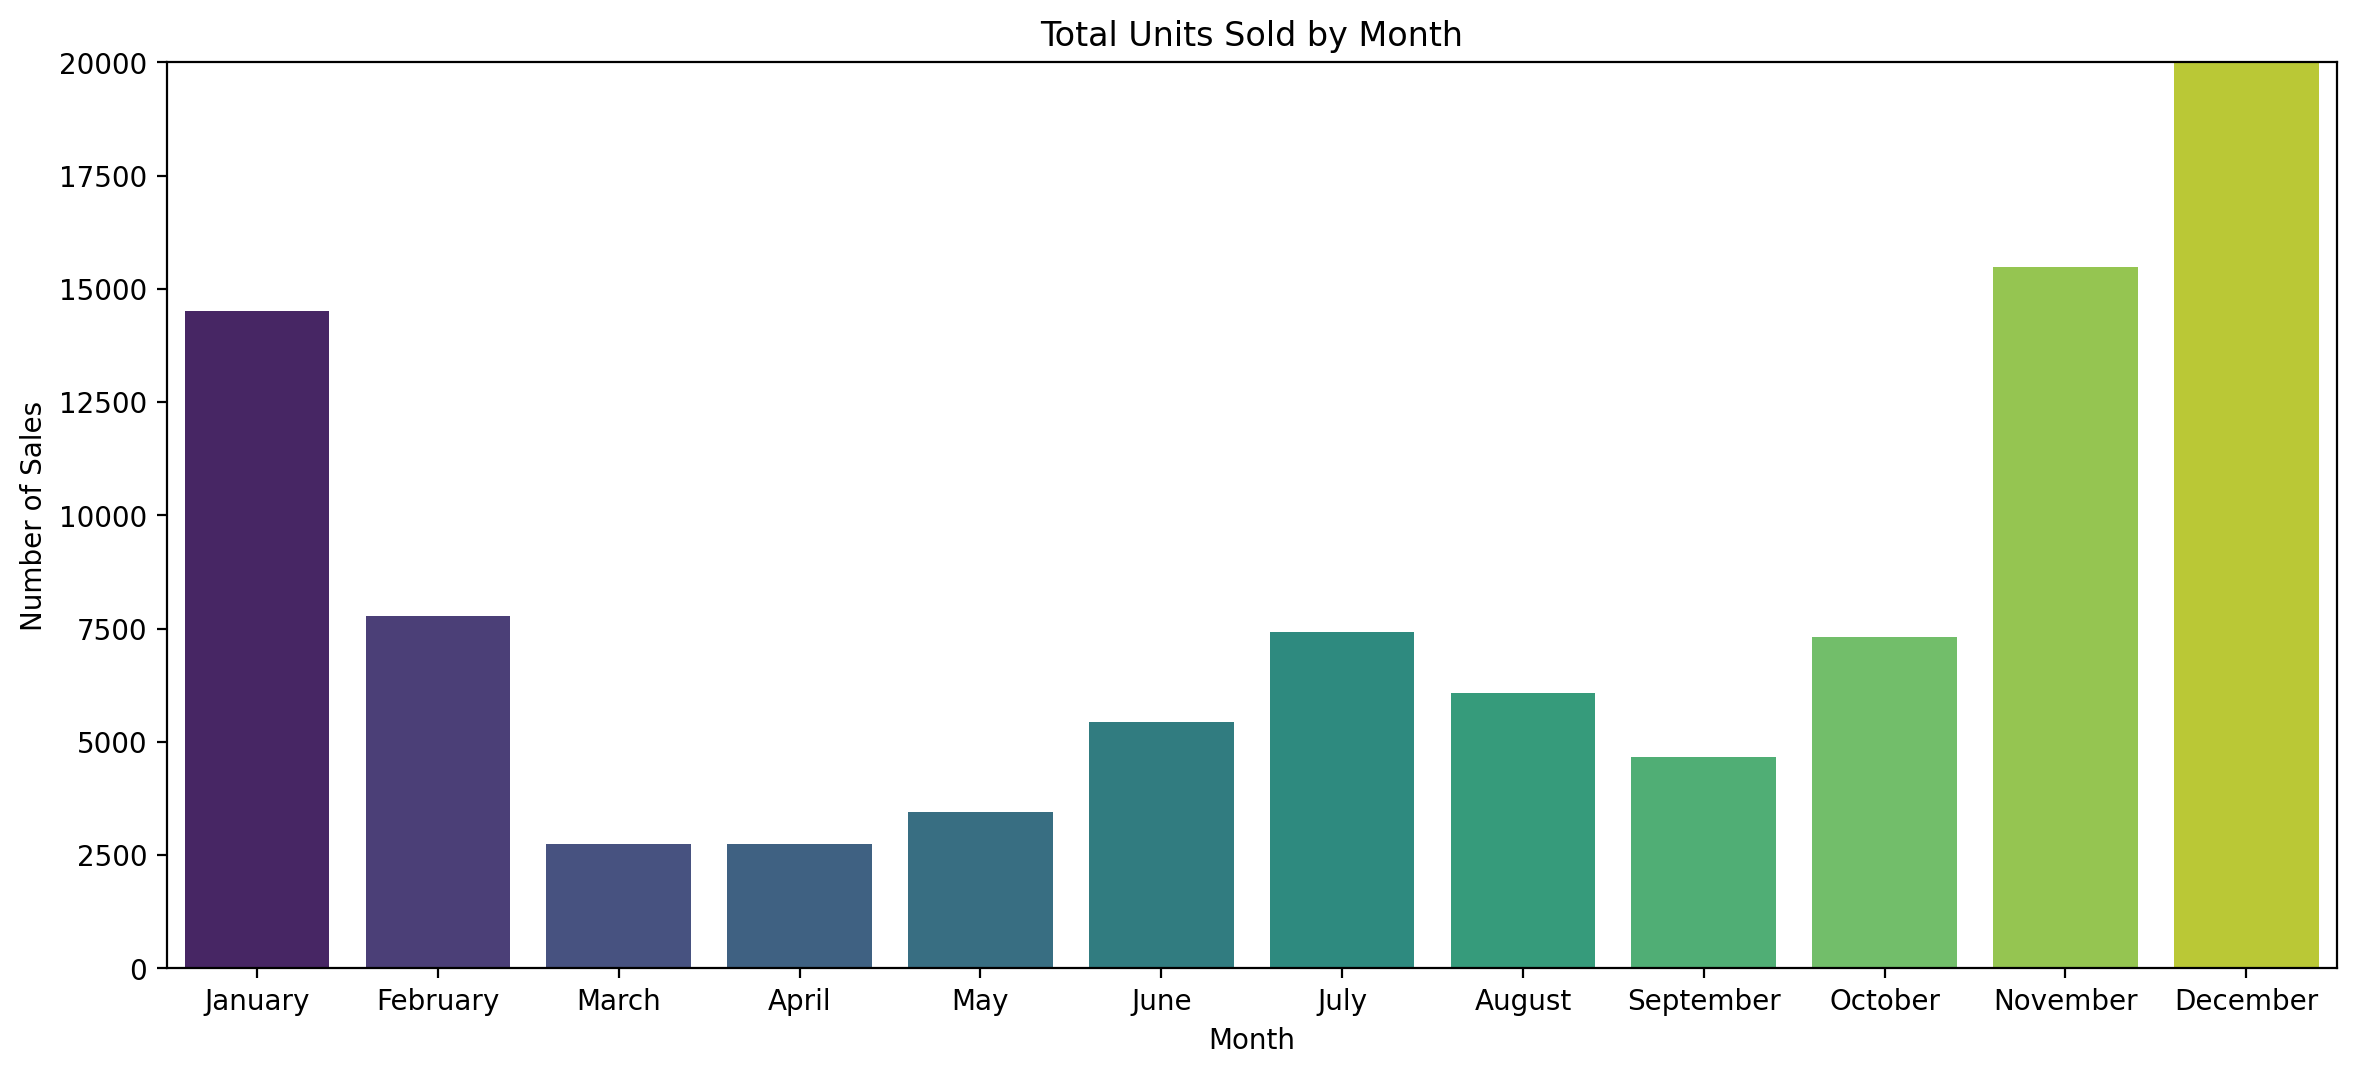

In [231]:
#Total units sold per month
plt.figure(figsize=(14,6), dpi=200)
plt.ylim(0,20000)
ax = sns.countplot(data=df,x='Month',order=['January','February', 'March', 'April', 'May', 'June', 'July', 'August','September'
                                           ,'October', 'November', 'December']
                  ,palette='viridis')
ax.set_ylabel('Number of Sales')
plt.title('Total Units Sold by Month')
plt.show()

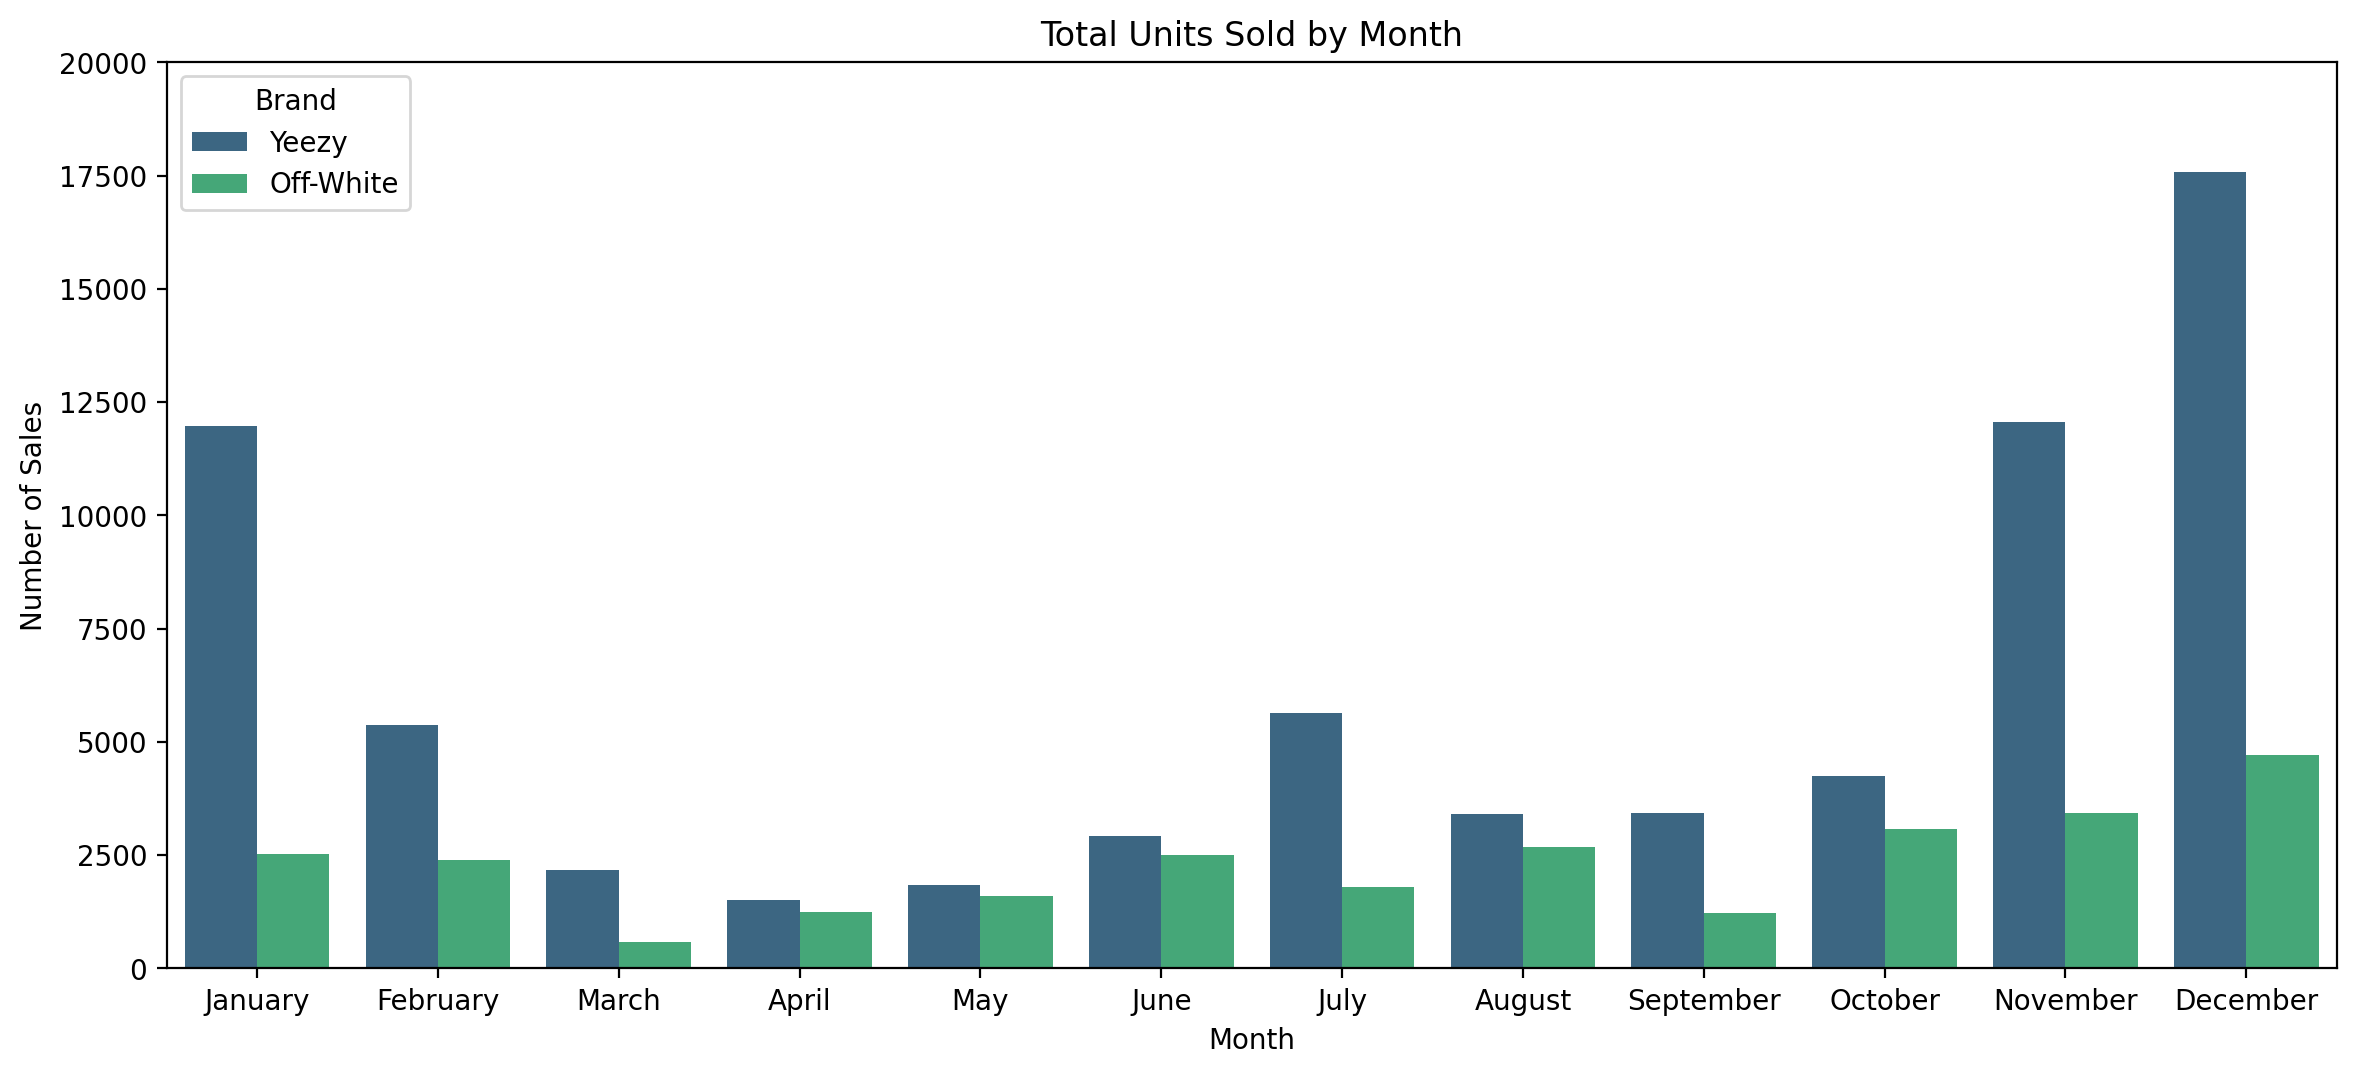

In [232]:
#Total units sold per month by brand
plt.figure(figsize=(14,6), dpi=200)
plt.ylim(0,20000)
ax = sns.countplot(data=df,x='Month',order=['January','February', 'March', 'April', 'May', 'June', 'July', 'August','September'
                                           ,'October', 'November', 'December'],palette='viridis', hue='Brand')
ax.set_ylabel('Number of Sales')
plt.title('Total Units Sold by Month')
plt.show()

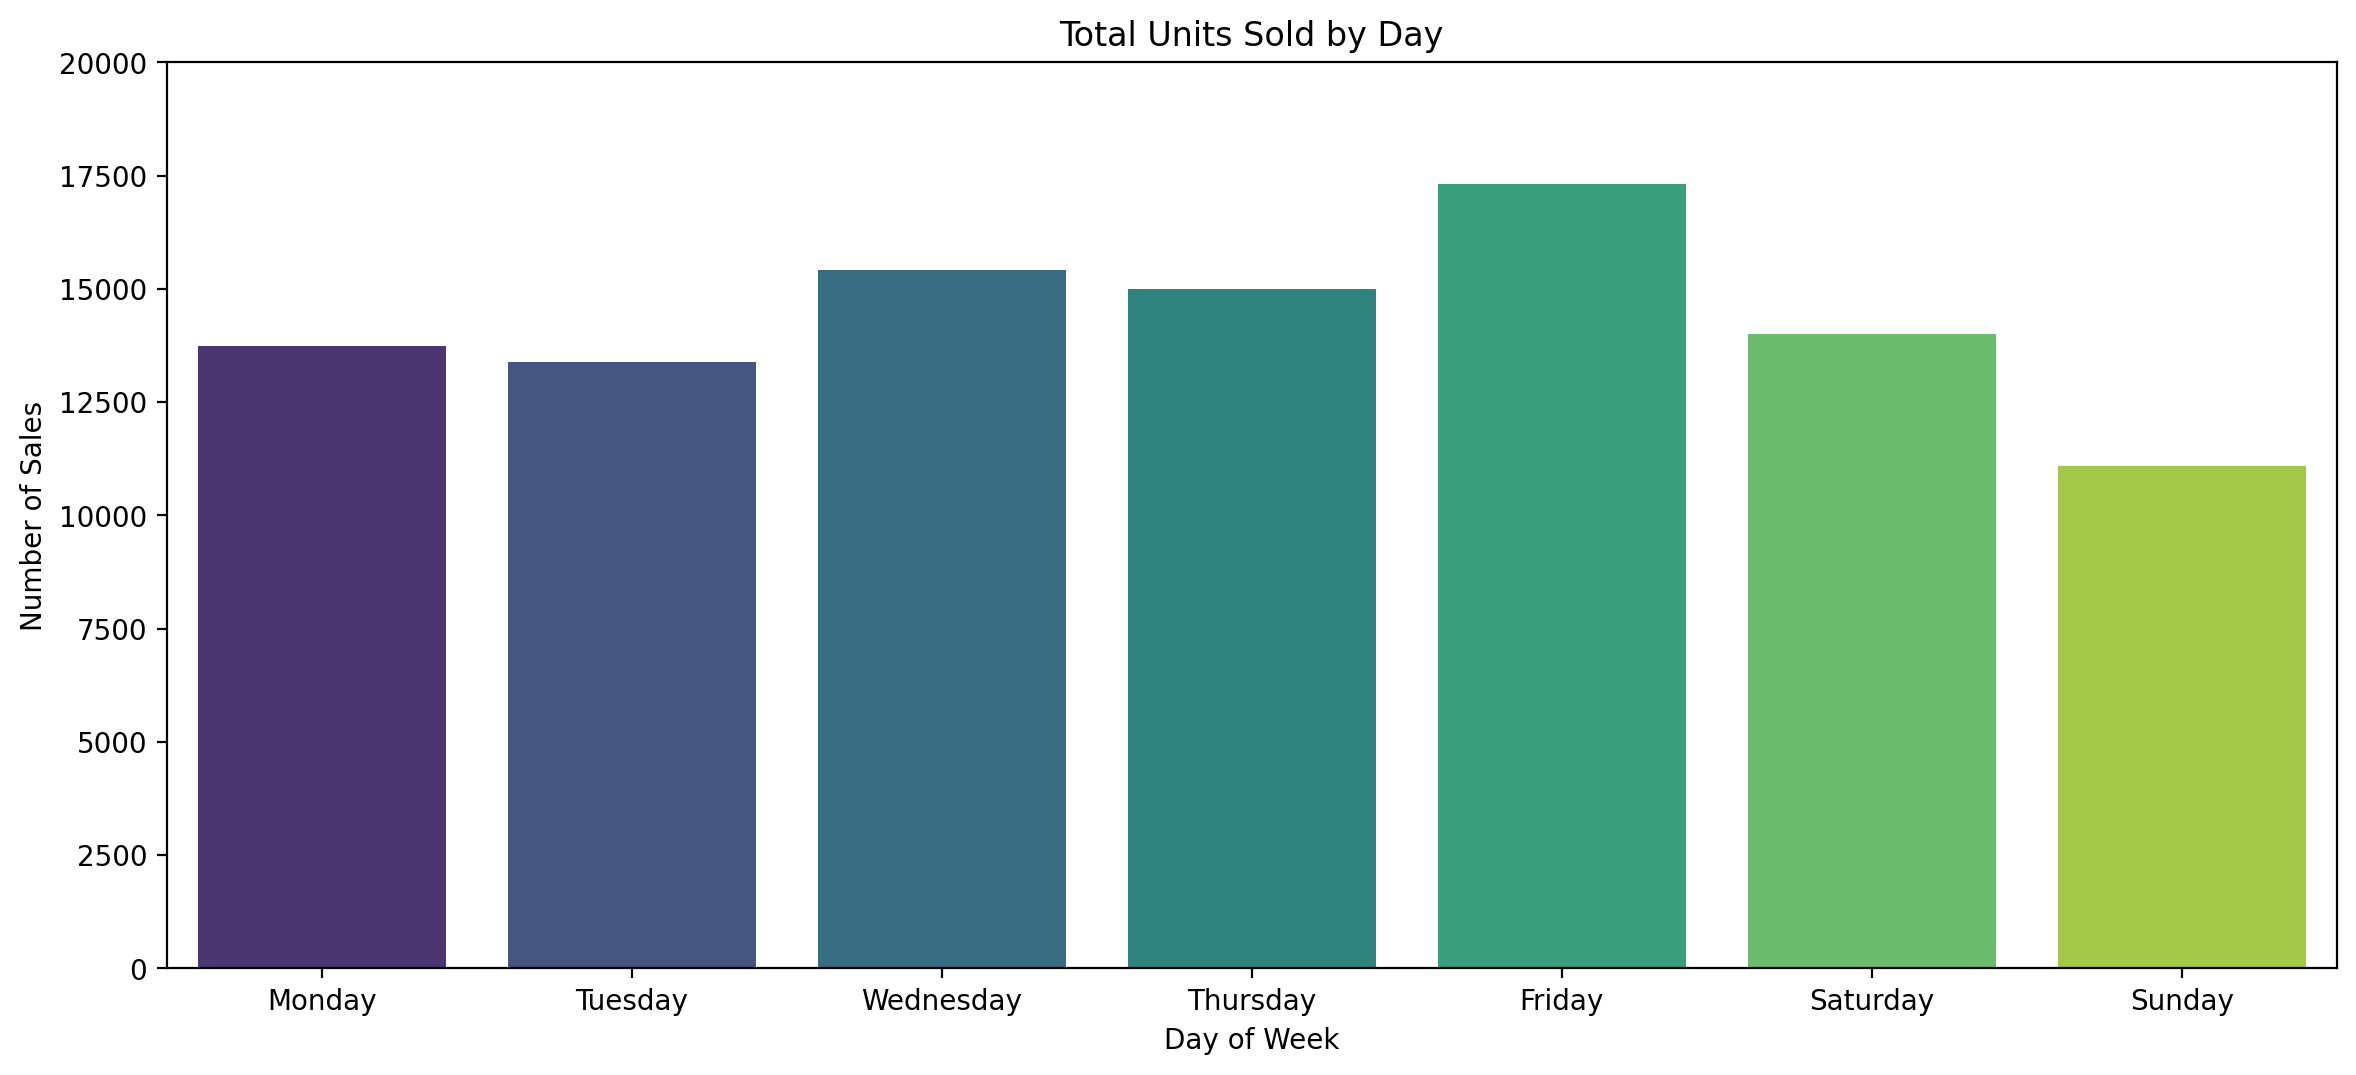

In [233]:
#Total units sold per day of week
plt.figure(figsize=(14,6), dpi=200)
plt.ylim(0,20000)
ax = sns.countplot(data=df,x='Day of Week',order=['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
                  ,palette='viridis')
ax.set_ylabel('Number of Sales')
plt.title('Total Units Sold by Day')
plt.show()

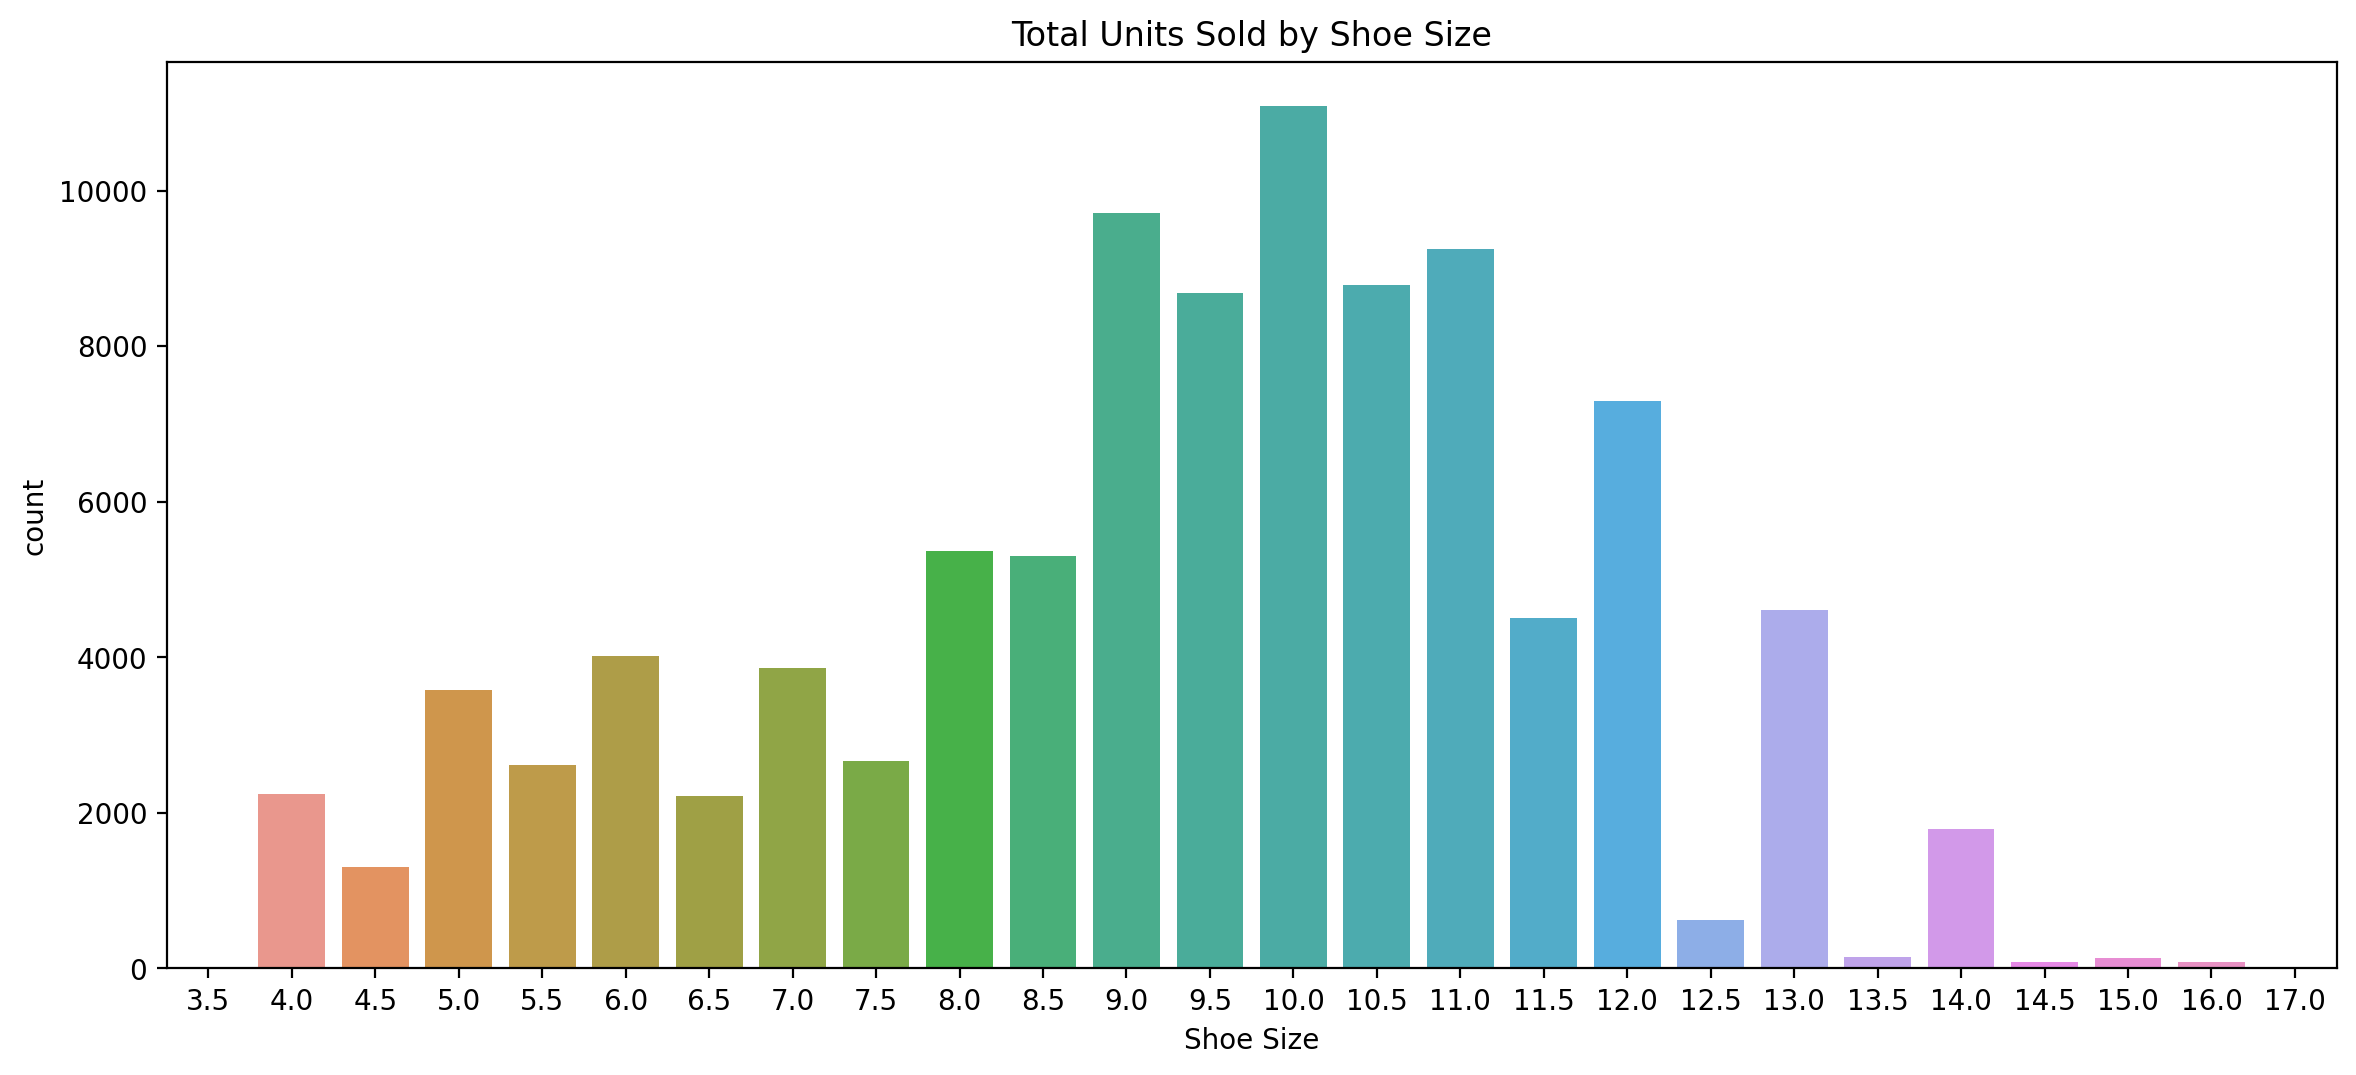

In [162]:
#Total units sold per shoe size
plt.figure(figsize=(14,6), dpi=200)
plt.title('Total Units Sold by Shoe Size')
sns.countplot(data=df,x='Shoe Size')
plt.show()

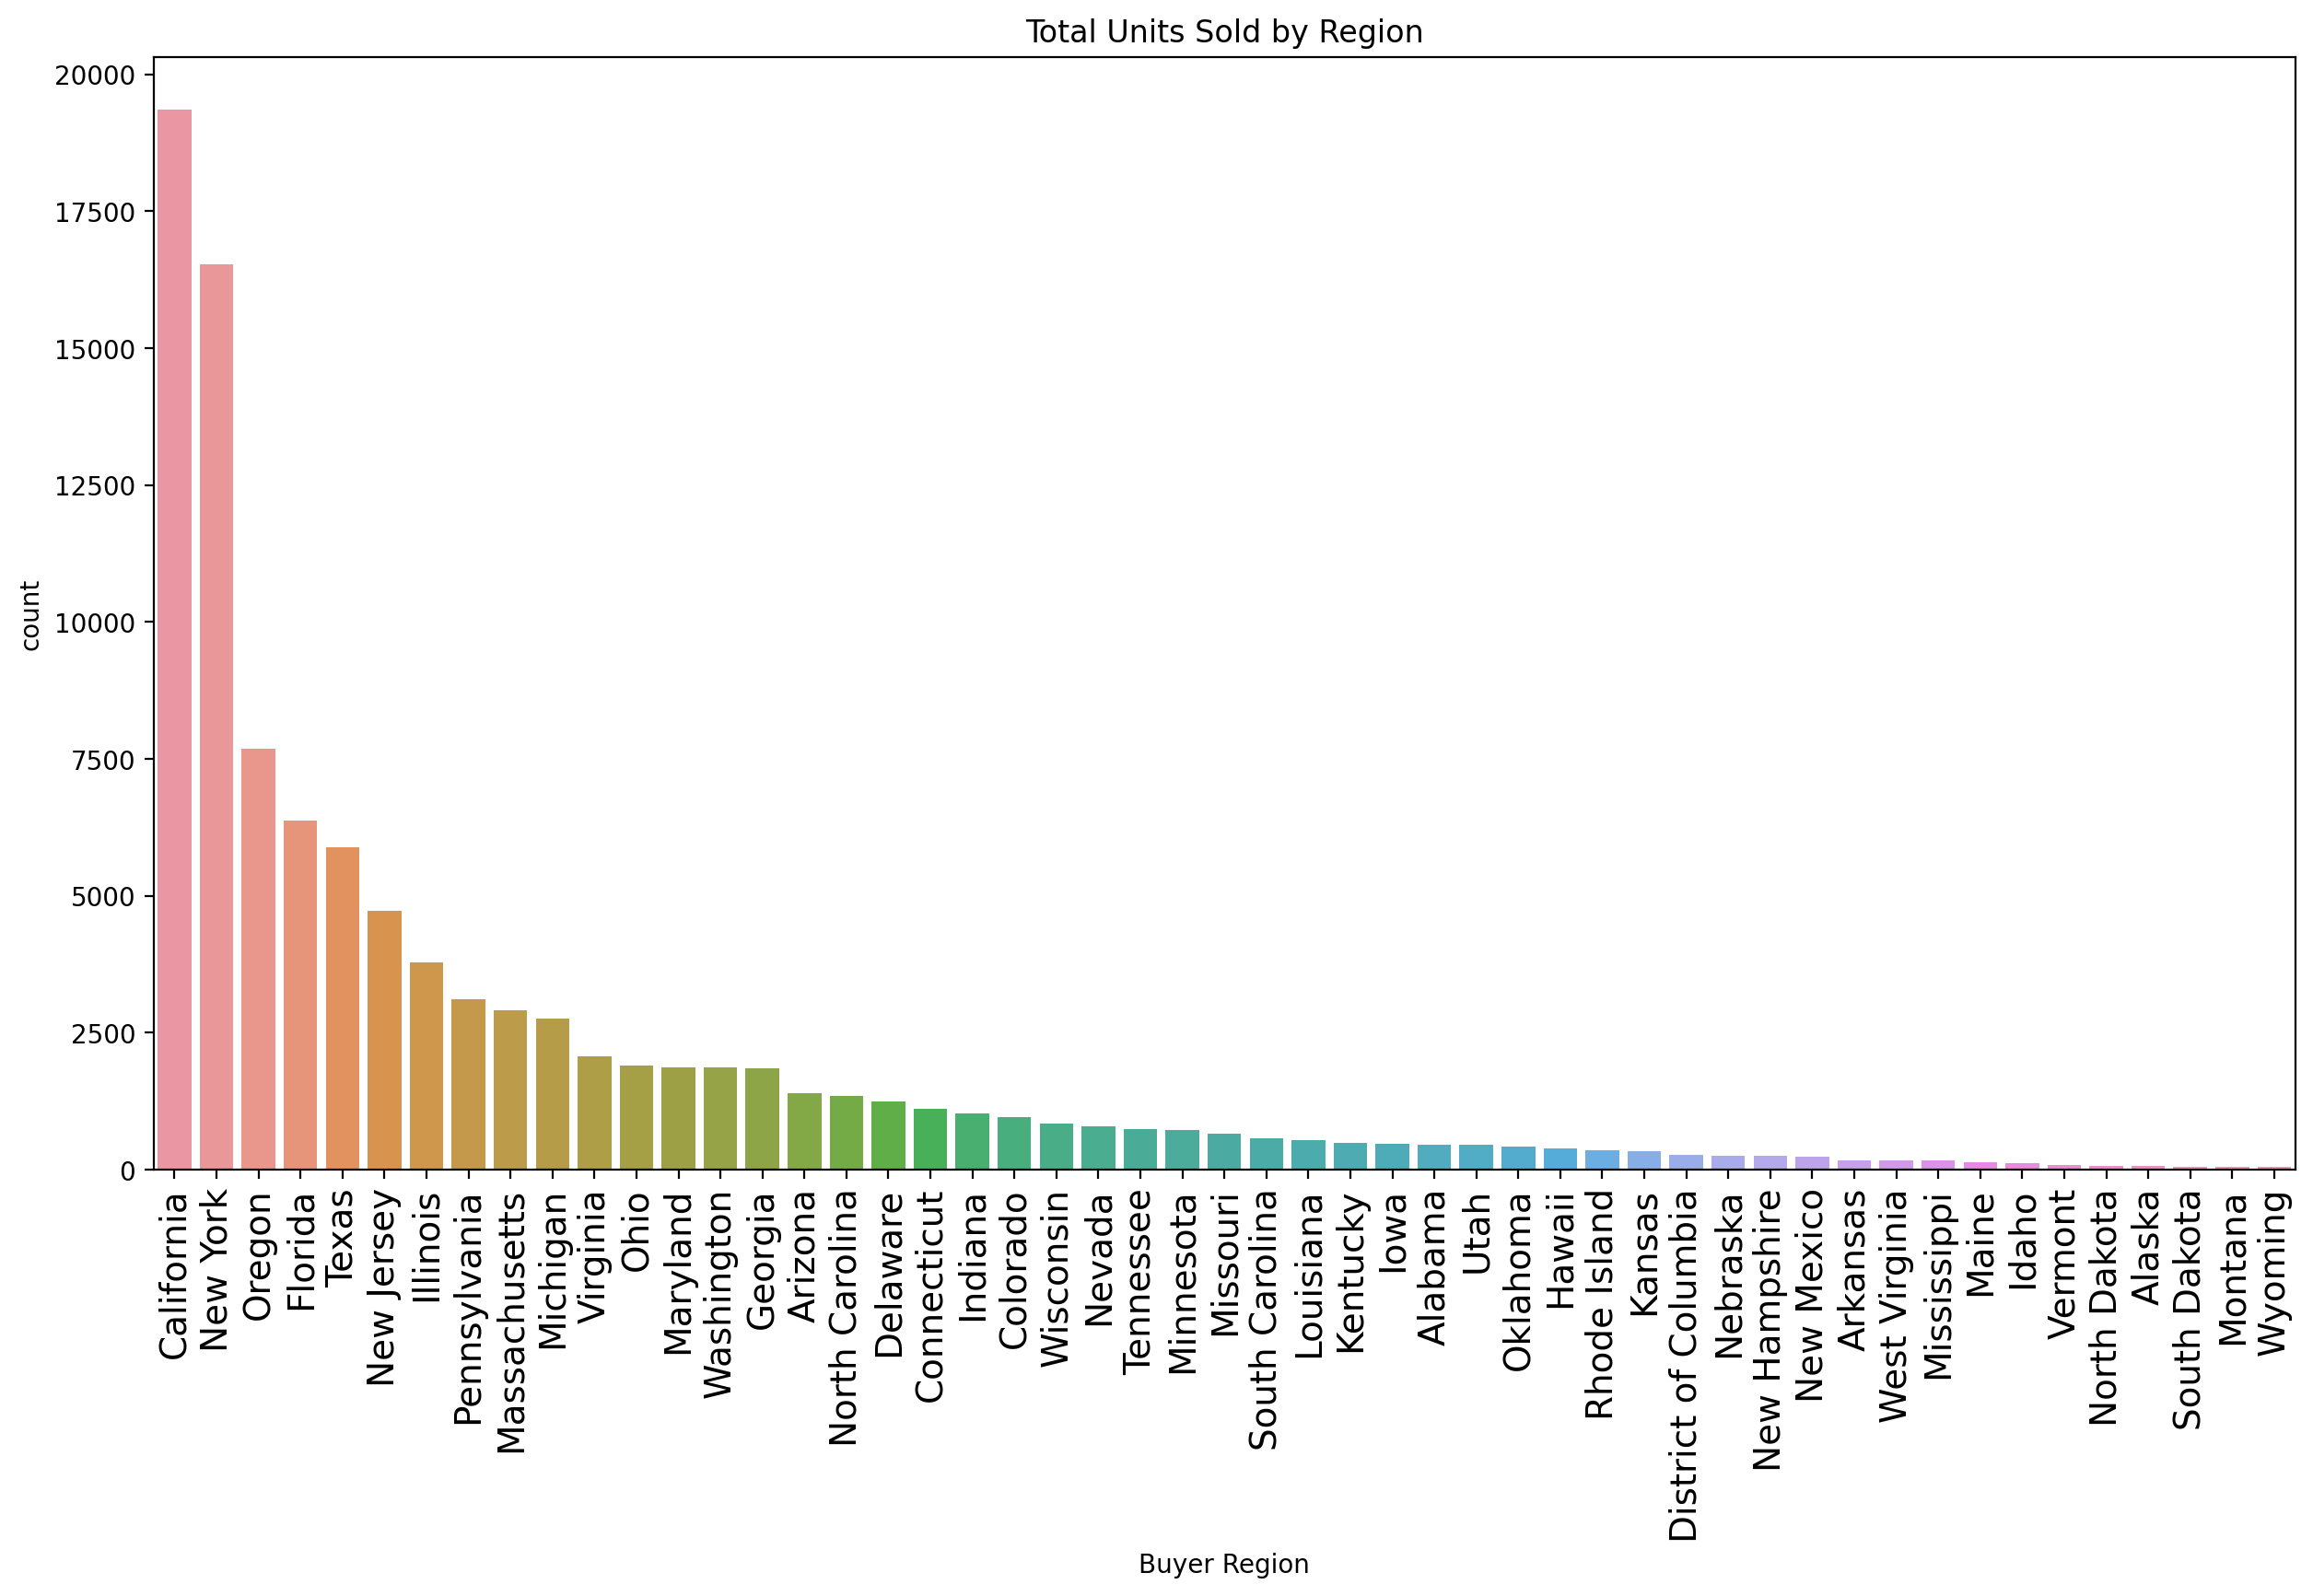

In [163]:
#Total units sold by region
plt.figure(figsize=(15,8), dpi=200)
plt.xticks(rotation=90,fontsize=14)
plt.title('Total Units Sold by Region')
sns.countplot(data=df,x='Buyer Region', order = df['Buyer Region'].value_counts().index)
plt.show()

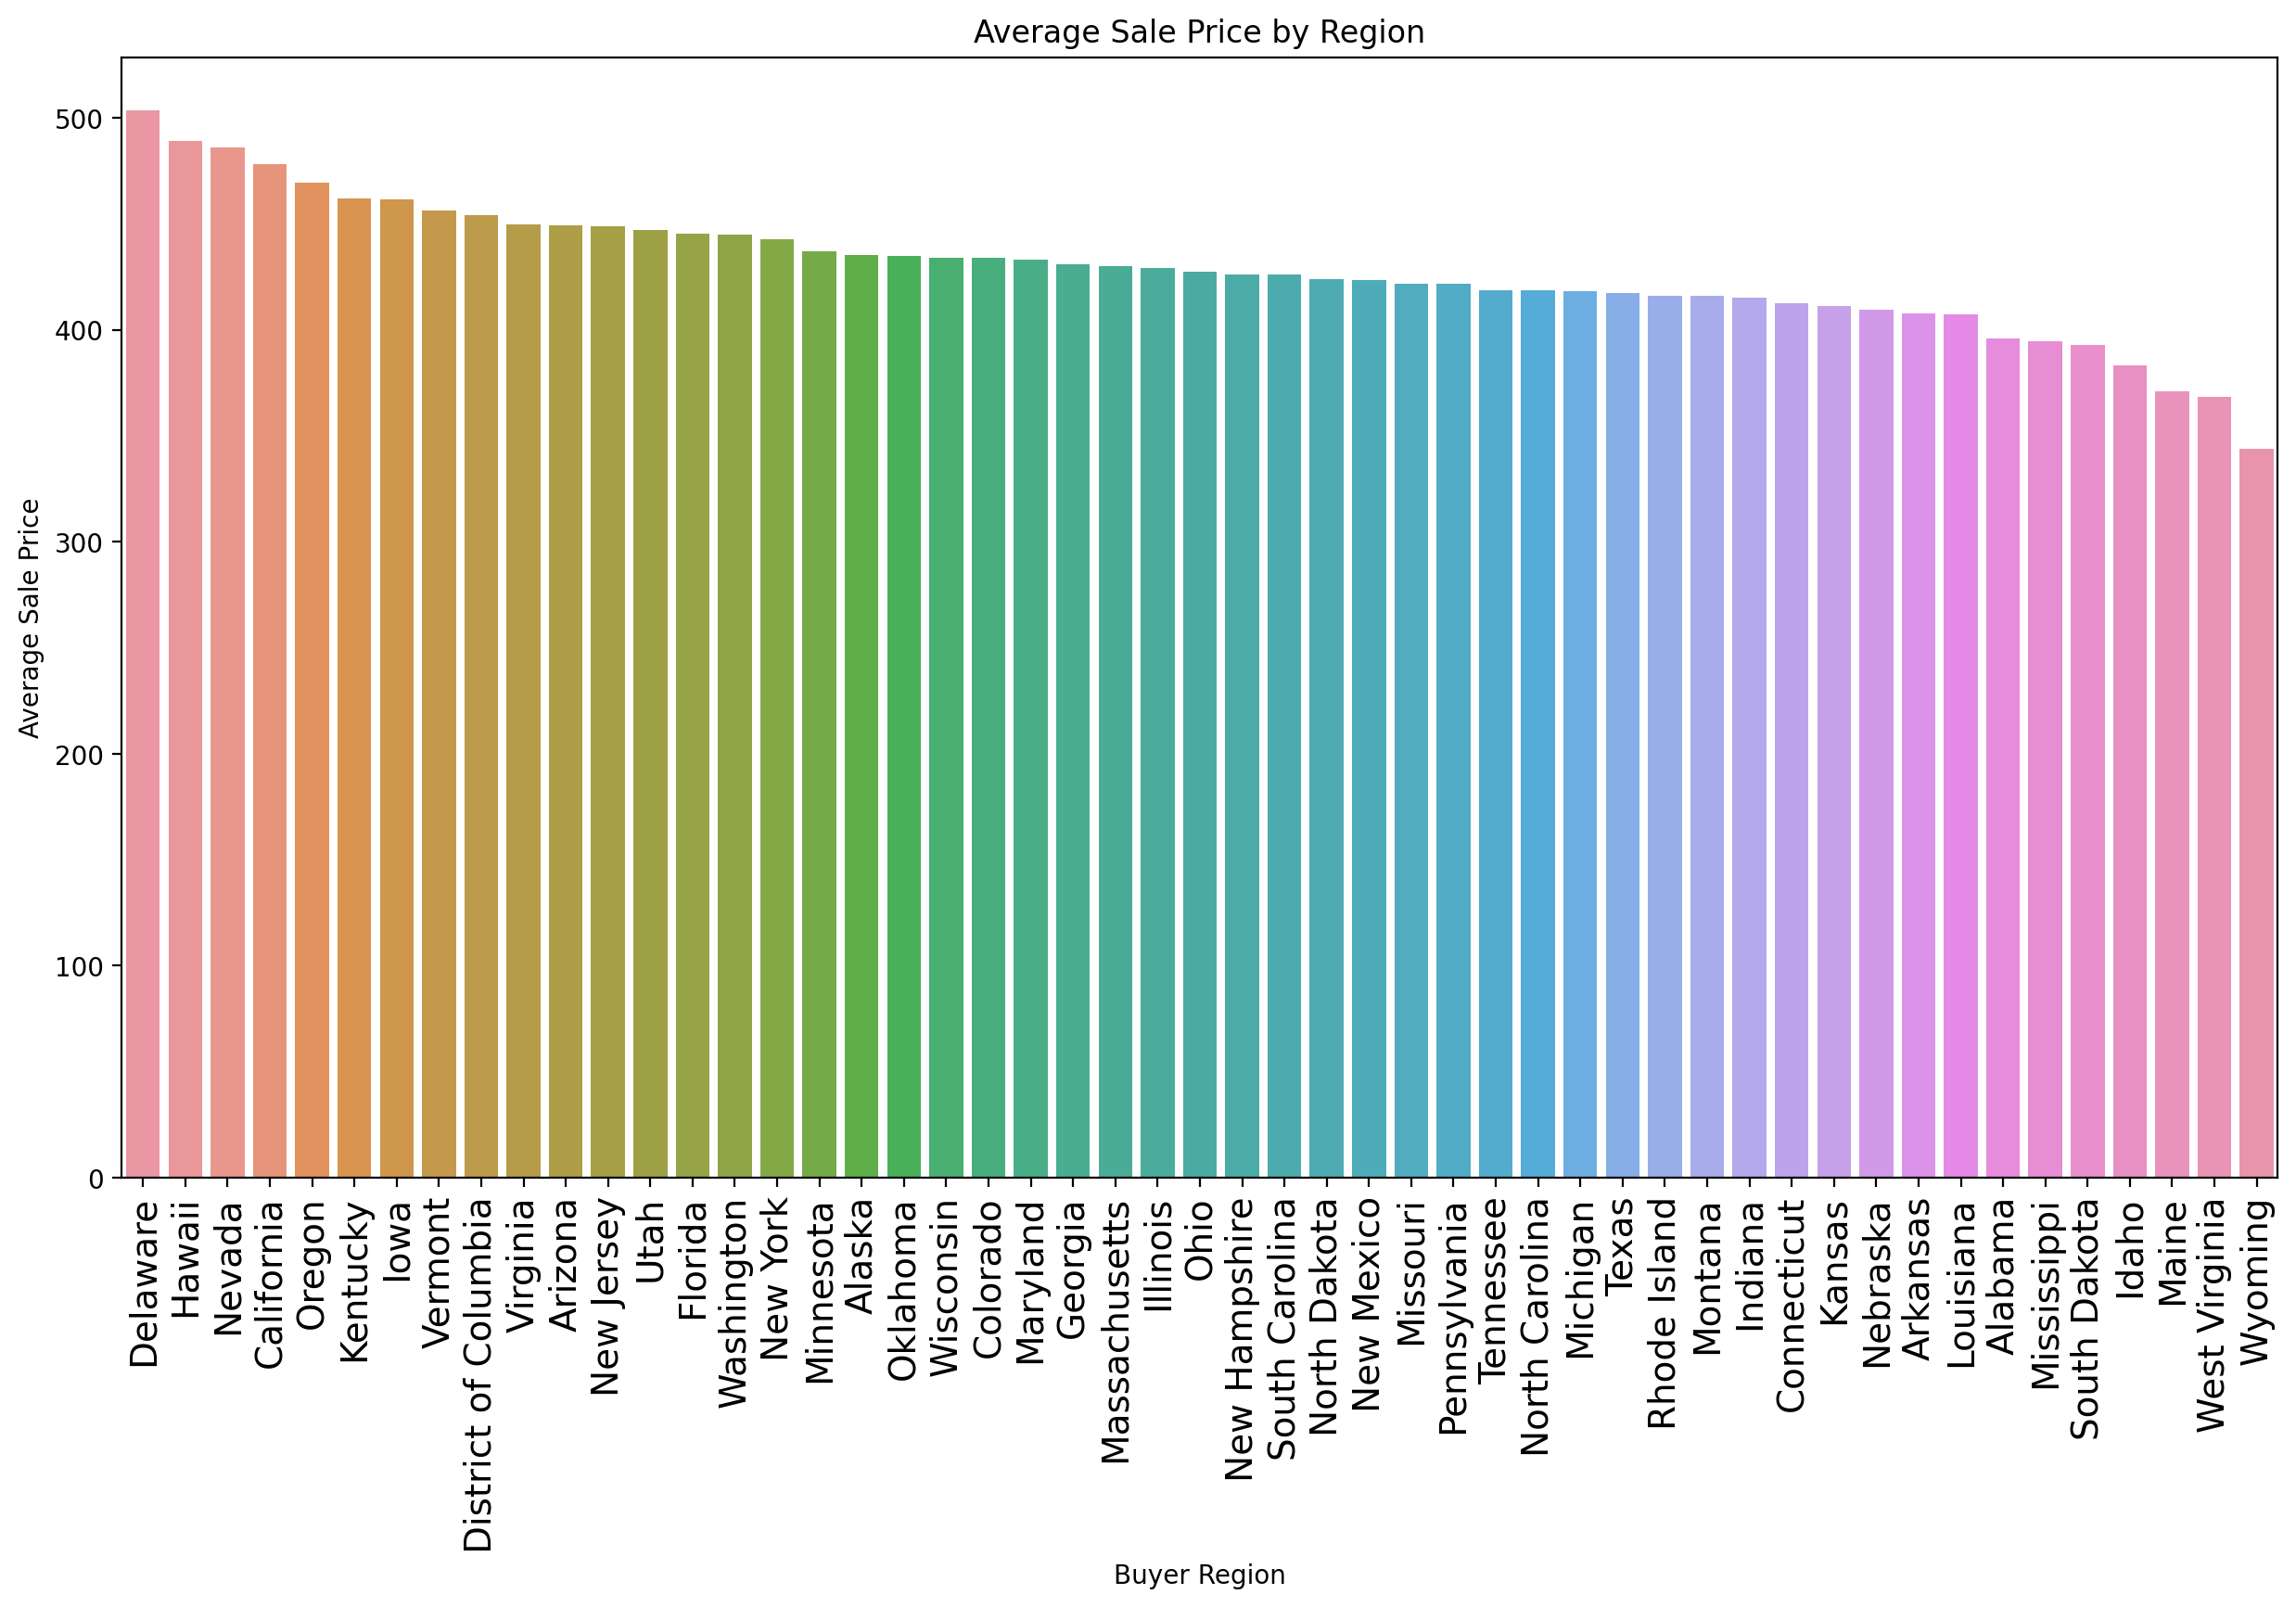

In [164]:
ds = pd.Series(df.groupby('Buyer Region').mean()['Sale Price'])
ds = ds.sort_values(ascending=False)
sorted_df = pd.DataFrame(ds)
sorted_df = sorted_df.reset_index()
plt.figure(figsize=(15,8), dpi=200)
plt.xticks(rotation=90,fontsize=14)
plt.title('Average Sale Price by Region')
ax = sns.barplot(data=sorted_df, x='Buyer Region', y='Sale Price')
ax.set_ylabel('Average Sale Price')
plt.show()

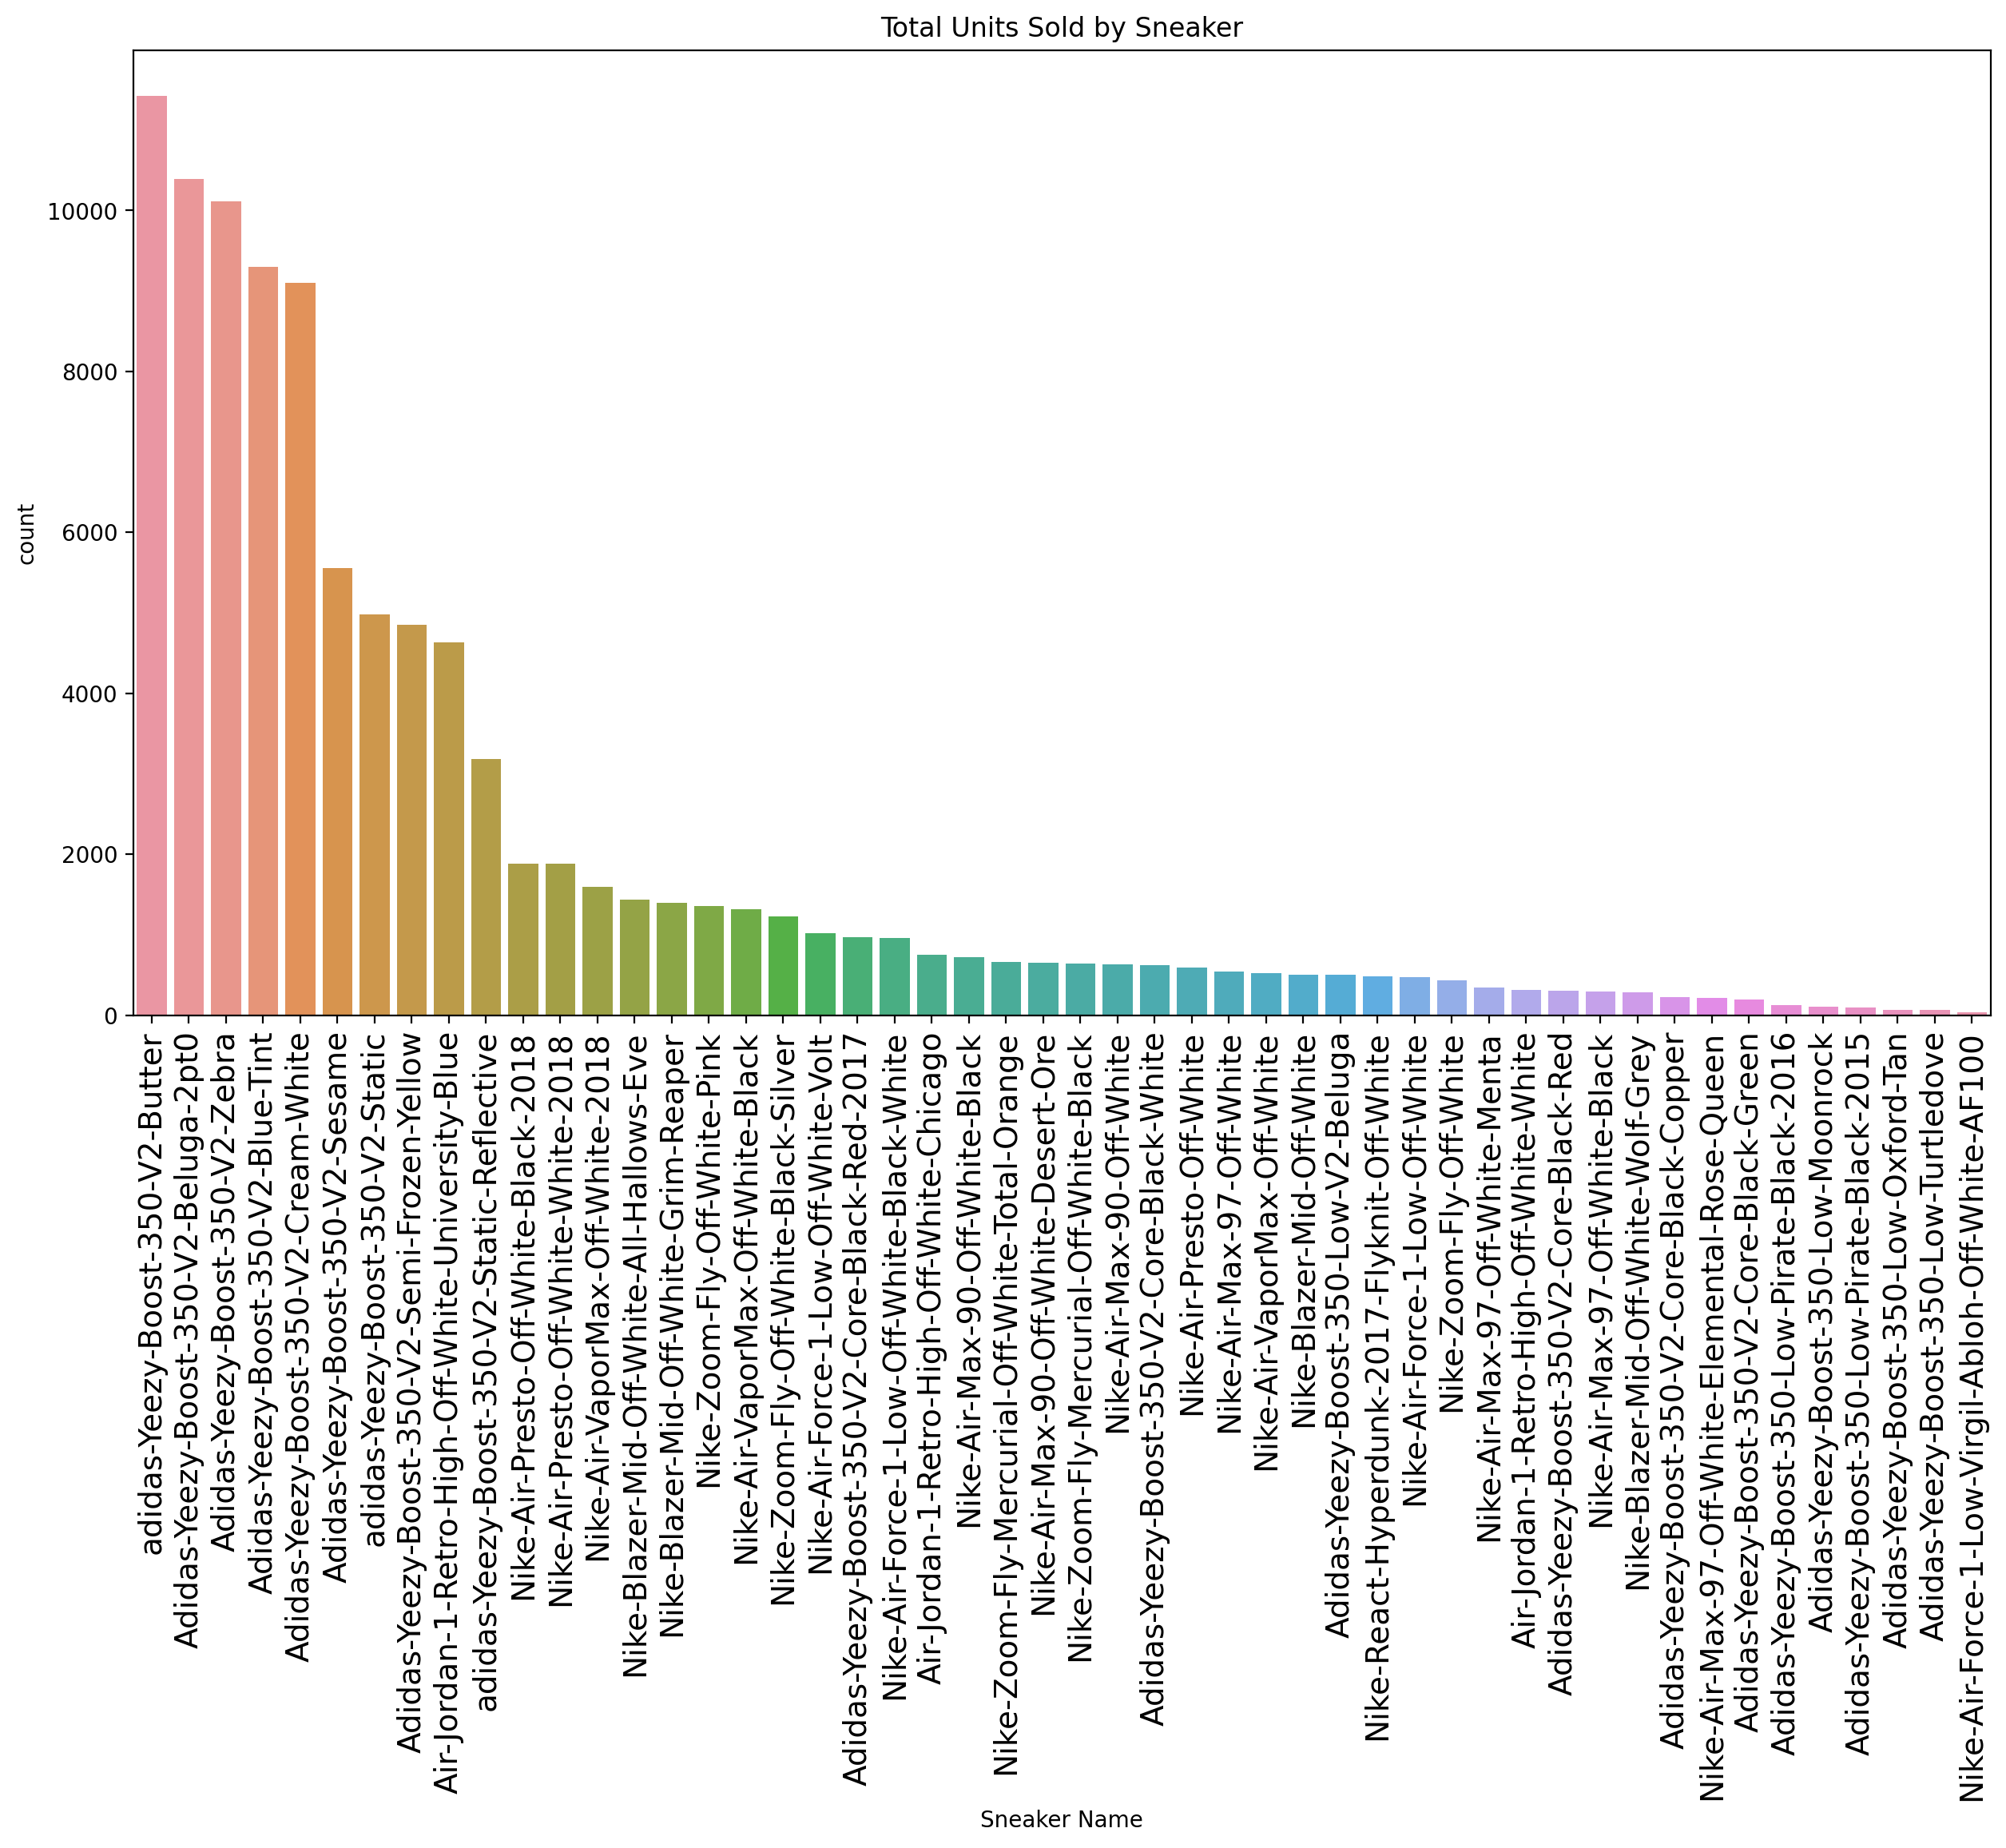

In [165]:
plt.figure(figsize=(15,8), dpi=200)
plt.xticks(rotation=90,fontsize=14)
plt.title('Total Units Sold by Sneaker')
sns.countplot(data=df,x='Sneaker Name', order = df['Sneaker Name'].value_counts().index)
plt.show()

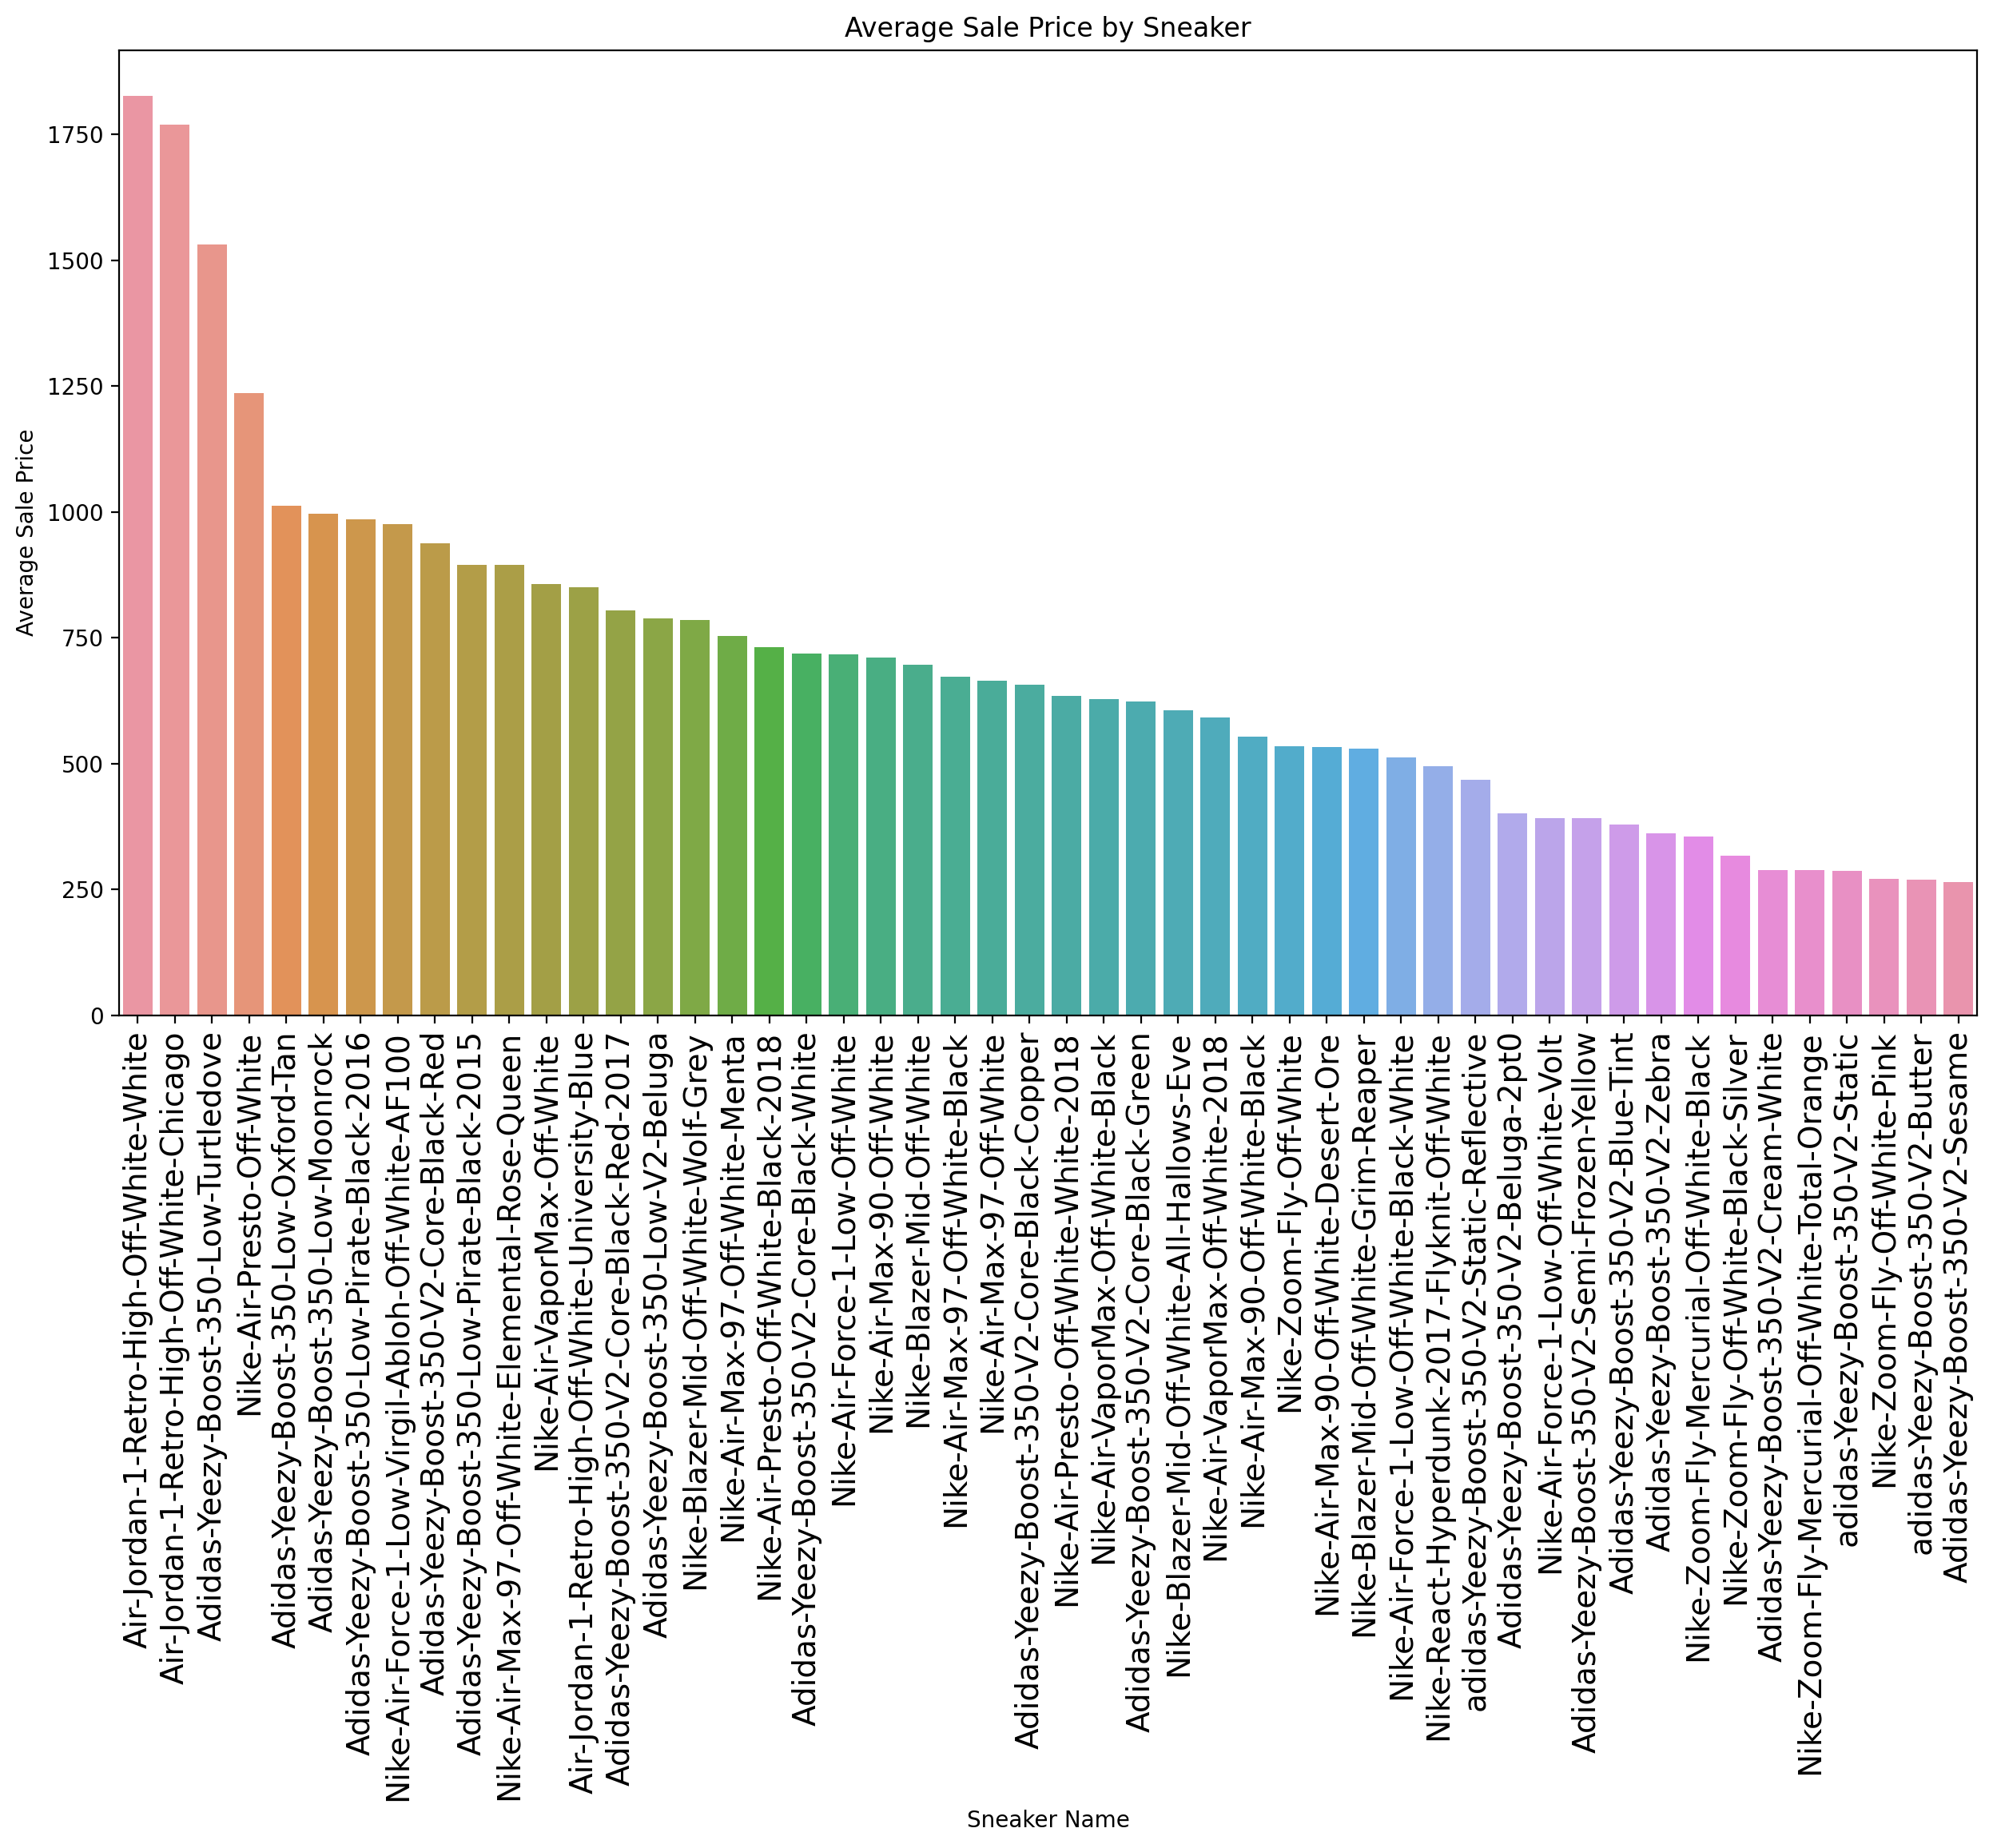

In [166]:
avg_sneaker_price = pd.Series(df.groupby('Sneaker Name').mean()['Sale Price'])
avg_sneaker_price = avg_sneaker_price.sort_values(ascending=False)

avg_sneaker_price_df = pd.DataFrame(avg_sneaker_price)
avg_sneaker_price_df = avg_sneaker_price_df.reset_index()
plt.figure(figsize=(15,8), dpi=200)
plt.xticks(rotation=90,fontsize=14)
plt.title('Average Sale Price by Sneaker')
ax = sns.barplot(data=avg_sneaker_price_df, x='Sneaker Name', y='Sale Price')
ax.set_ylabel('Average Sale Price')
plt.show()

#### KDE plot to show distribution of sales price of the two different brands

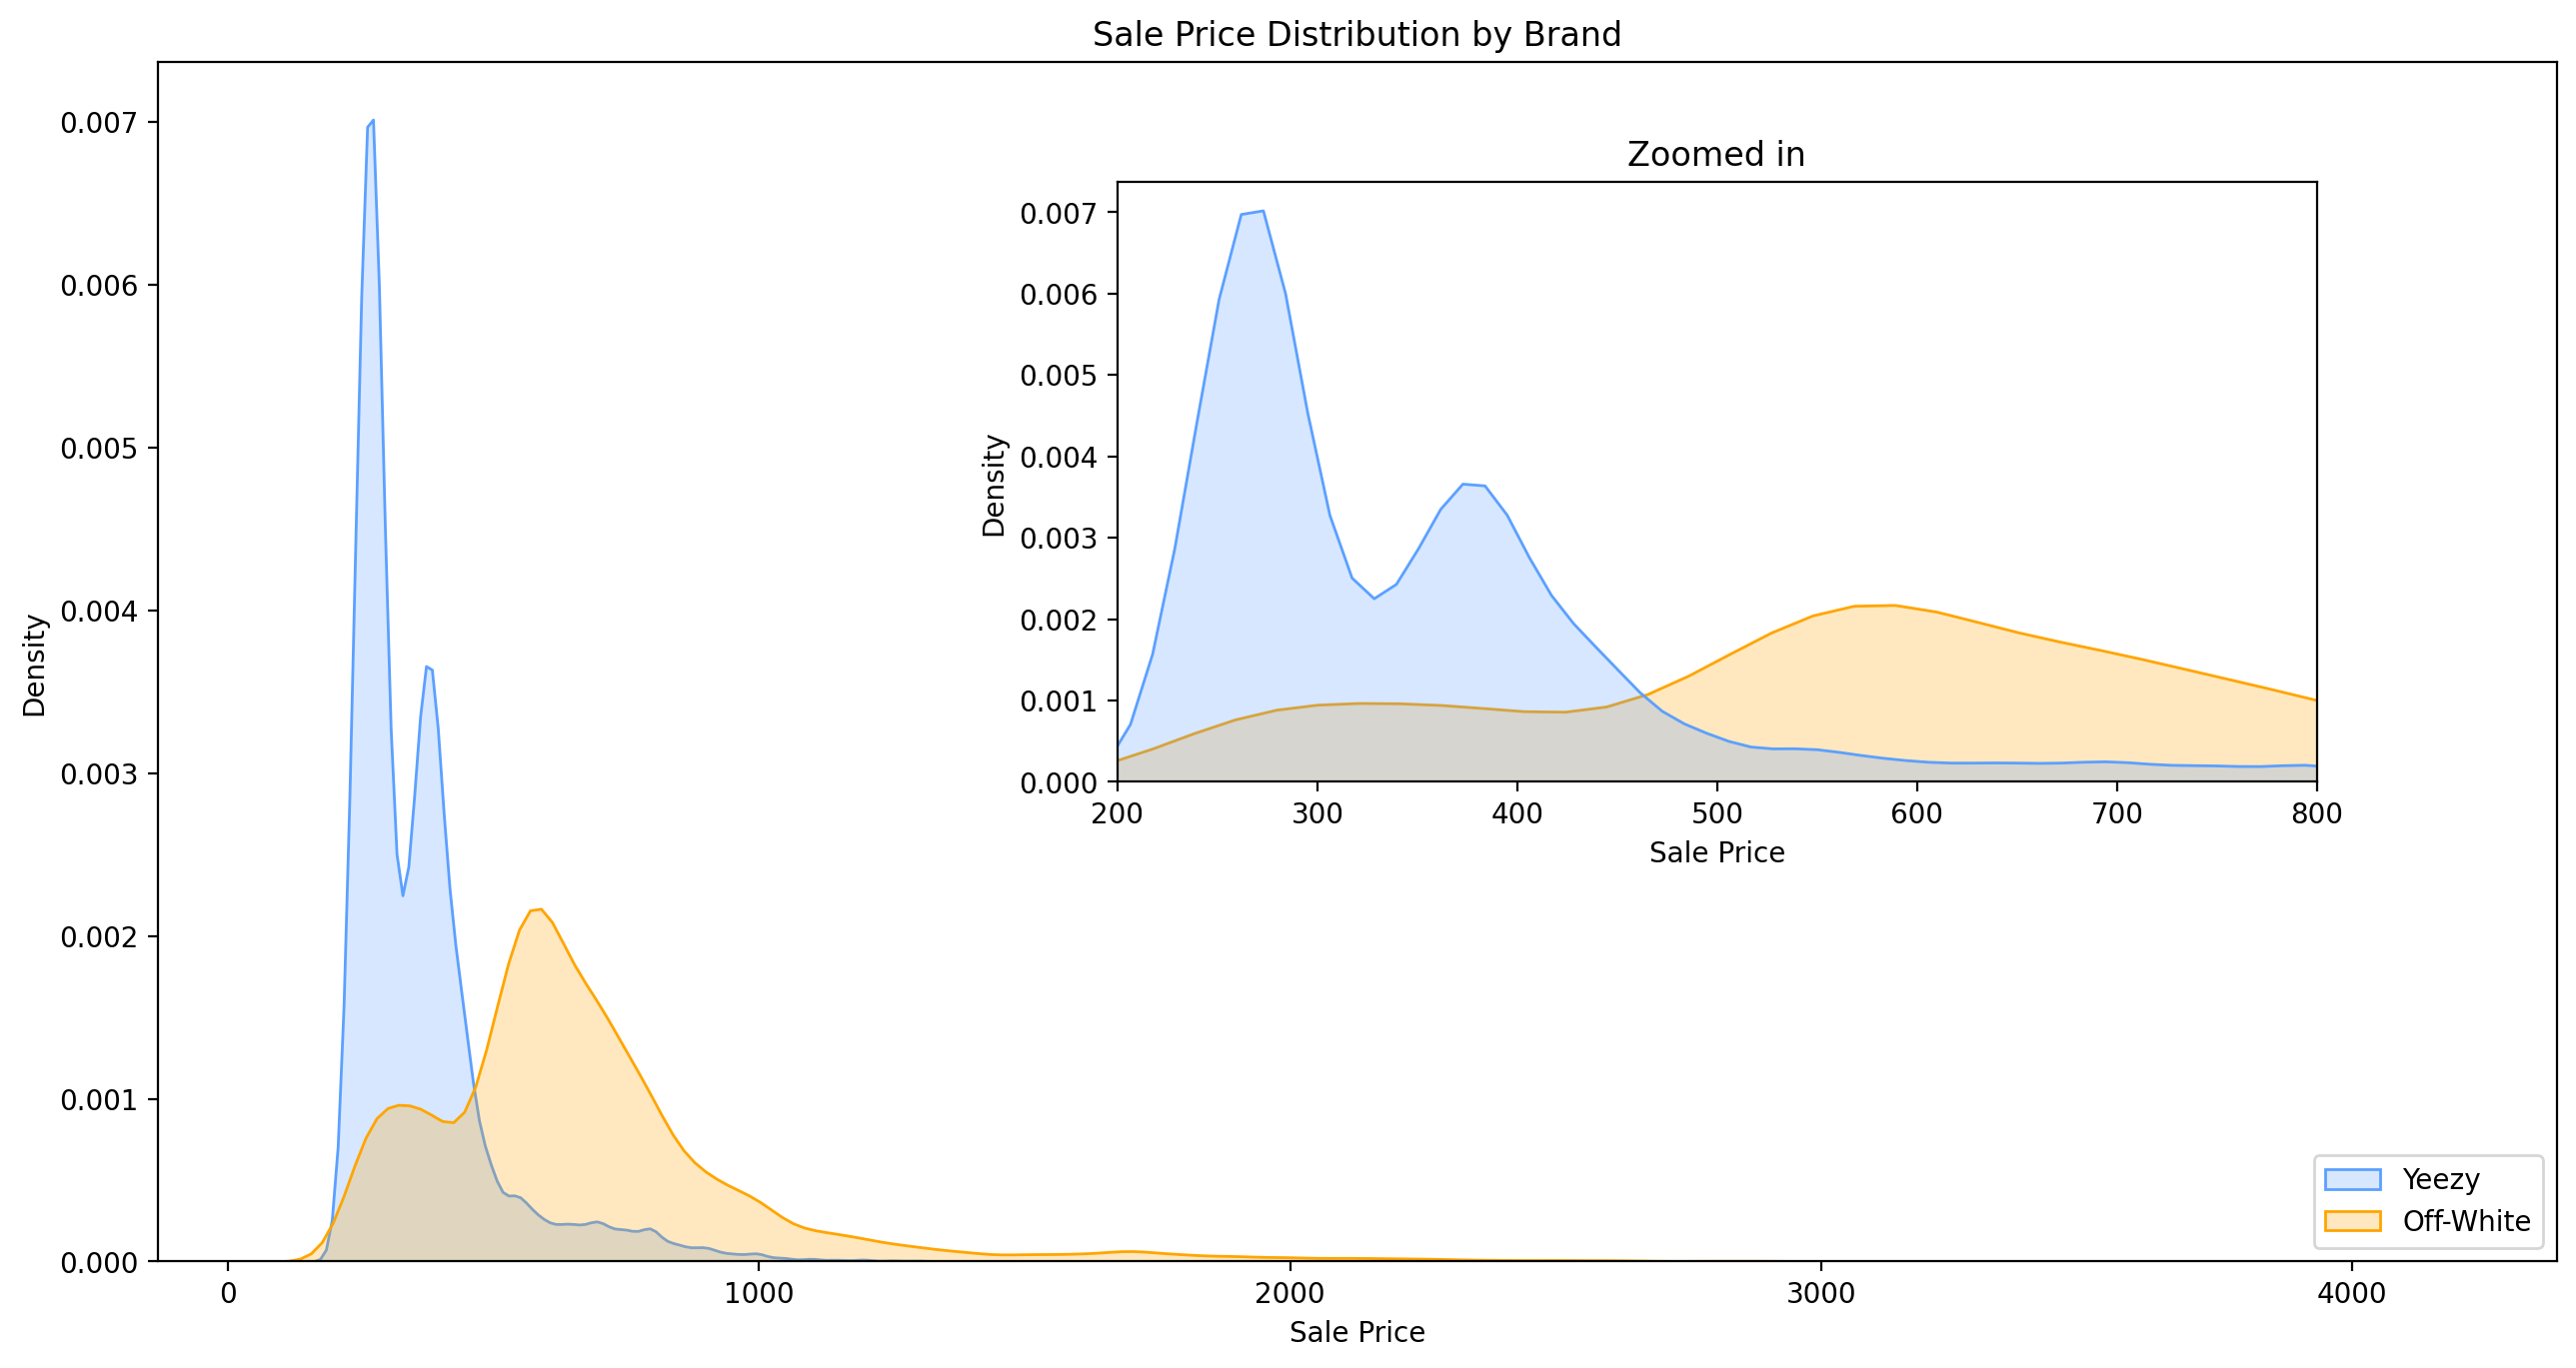

In [213]:
fig = plt.figure(figsize=(12,6), dpi=200)
ax_out = fig.add_axes([0,0,1,1])
ax_out = sns.kdeplot(data=df[df['Brand'] == 'Yeezy'], x='Sale Price',shade=True, label='Yeezy', color='#5ca0ff')
ax_out = sns.kdeplot(data=df[df['Brand'] == 'Off-White'], x='Sale Price',shade=True, label='Off-White', color='orange')
ax_out.legend(loc=4)
ax_out = plt.title('Sale Price Distribution by Brand')

ax_in = fig.add_axes([0.4,0.4,0.5,0.5])
ax_in = sns.kdeplot(data=df[df['Brand'] == 'Off-White'], x='Sale Price',shade=True, label='Off-White', color='orange')
ax_in = sns.kdeplot(data=df[df['Brand'] == 'Yeezy'], x='Sale Price',shade=True, label='Yeezy', color='#5ca0ff')
ax_in = plt.title('Zoomed in')
ax_in = plt.xlim(200,800)

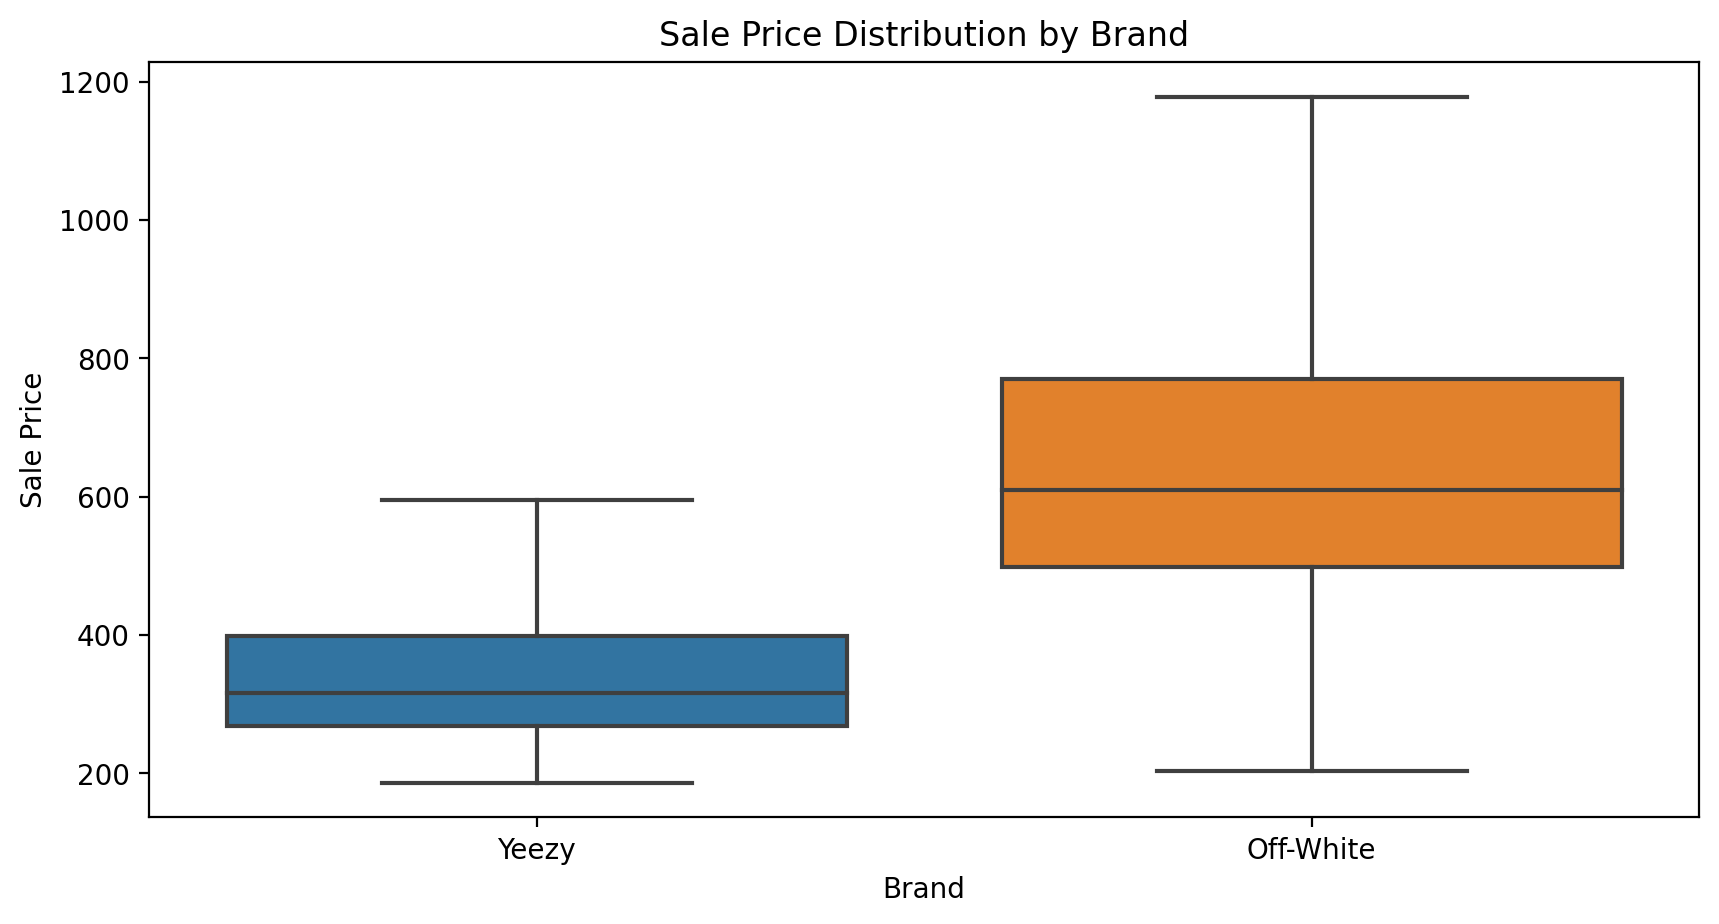

In [187]:
#Boxplot distribution of sale price by brand with showfliers=False
plt.figure(figsize=(10,5), dpi=200)
plt.title('Sale Price Distribution by Brand')
sns.boxplot(data=df,x='Brand', y='Sale Price', showfliers=False)
plt.show()

### Rugplot to see the full spread of sales price

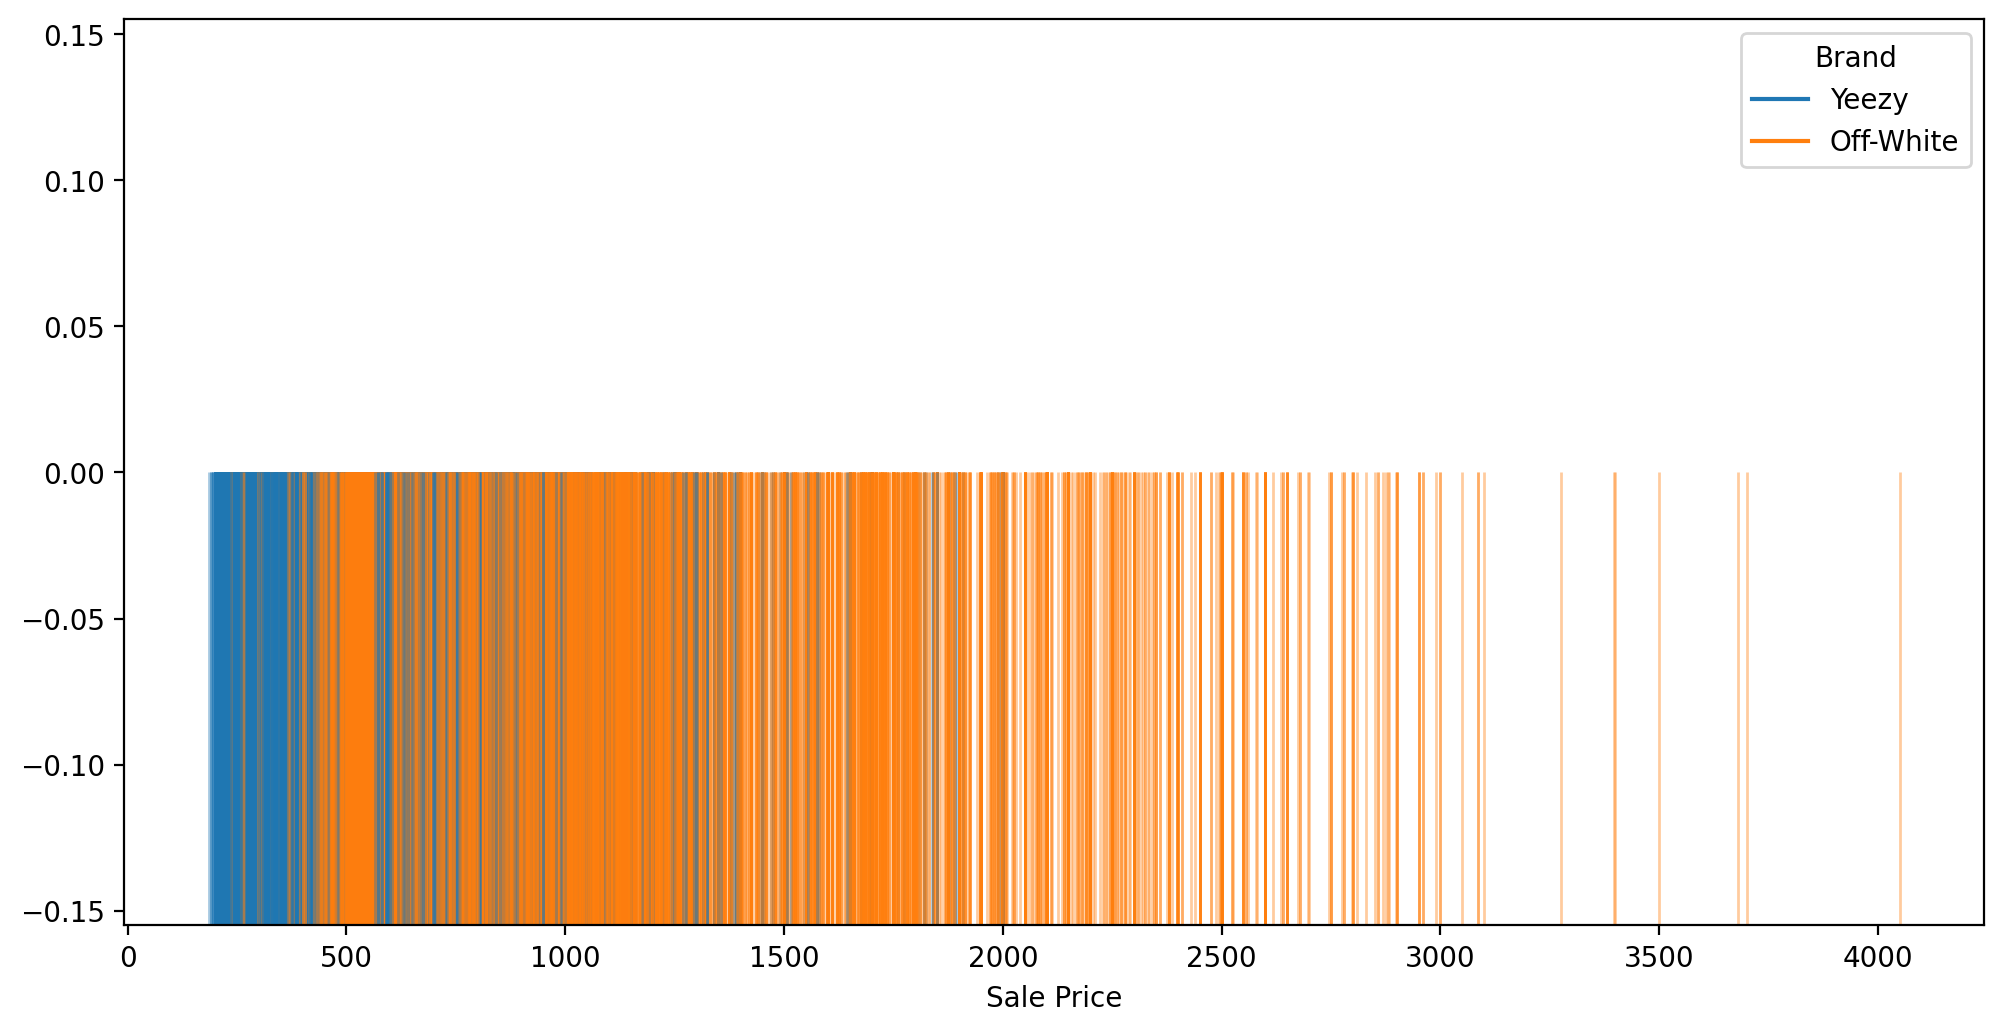

In [169]:
plt.figure(figsize=(12,6), dpi=200)
sns.rugplot(data=df, x='Sale Price', height=0.5, hue='Brand', alpha=0.4)
plt.show()

# Insights
* 9 out of the 10 most sold sneakers are from Yeezy
* No Off-White sneakers sold for their retail price or less
* Off-White has higher average profit, profit margin and sale price than Yeezy
* March and April sold the least number of sneakers, November and December (holiday periods) sold the most, peaking in December
* Yeezy out-sold Off-White every month
* Yeezys' sold more than 2.5 times more compared to Off-White
* Sales during the week peak on Fridays, while Sundays have the least number of sales
* Shoe size 10 is the most popular shoe size with 9 and 11 close behind
* Half sizes sold fewer sneakers than their full size
* California purchased the most number of sneakers, this may be due to population size per region
* Adidas-Yeezy-Boost-350-V2-Butter is the most popular, selling the most